In [1]:
import numpy as np
import pandas as pd
from collections import Counter

import seaborn as sns
sns.set(rc={'figure.figsize':(6,4)})
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm
import random
import pickle
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Root Mean Square Error 
from sklearn.metrics import mean_squared_error
from math import sqrt

# for ignore warnings
import warnings
warnings.filterwarnings("ignore")

plot_data_list = []
plot_RSME_list = []

In [2]:
df = pd.read_csv('Dataset\LS Dataset(all)_RP.csv')
df.head()

,Age(years),Weight(kg),Height(cm),BMI,Gender,Profession,smoke,Exercise,cereal,salad,...,Poor and unplanned work,Lack of career development,Feeling of powerlessness,Lack of financial security,Unable to satisfy all stakeholders,High_Blood_Pressure,Blood_Sugar_Fasting,Blood_Sugar_Post_Meal,HbA1c_Glycated_Haemoglobin,Class
0,42,61.0,165,22.41,Male,Sitting-Job,No,Moderate,Once,Everyday,...,Low,Low,Low,Low,Low,No,Low,Low,Low,No
1,30,49.0,165,18.00,Female,Other,No,Inactive,Twice,Rarely,...,Average,Average,Low,Low,Low,No,Moderate,Moderate,Moderate,No
2,52,60.0,159,23.73,Male,Moving-Job,Yes,Moderate,Twice,Rarely,...,Very low,Very low,Very low,Very low,Very low,No,High,High,High,Yes
3,46,61.0,172,20.62,Male,Other,No,Low,Thrice,Sometimes,...,Average,Average,Very low,Average,Average,No,Low,Low,Low,No
4,45,65.0,155,27.06,Female,Moving-Job,No,Inactive,Twice,Everyday,...,Very low,Very High,Average,Average,Low,No,Low,Low,Low,No


In [3]:
df.shape

(375, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age(years)                          375 non-null    int64  
 1   Weight(kg)                          375 non-null    float64
 2   Height(cm)                          375 non-null    int64  
 3   BMI                                 375 non-null    float64
 4   Gender                              375 non-null    object 
 5   Profession                          375 non-null    object 
 6   smoke                               375 non-null    object 
 7   Exercise                            375 non-null    object 
 8   cereal                              352 non-null    object 
 9   salad                               349 non-null    object 
 10  vegetables                          372 non-null    object 
 11  grains                              375 non-n

In [5]:
round(df.describe(),2)

,Age(years),Weight(kg),Height(cm),BMI
count,375.00,375.00,375.00,375.00
mean,42.41,64.94,162.57,24.63
std,15.29,11.99,10.08,4.45
min,4.00,20.00,100.00,10.97
25%,30.00,57.00,155.50,22.20
50%,40.00,65.00,163.00,24.22
75%,53.00,72.00,168.00,27.15
max,90.00,102.00,193.00,52.00


In [6]:
# check null 
df.isnull().sum()

Age(years)                             0
Weight(kg)                             0
Height(cm)                             0
BMI                                    0
Gender                                 0
Profession                             0
smoke                                  0
Exercise                               0
cereal                                23
salad                                 26
vegetables                             3
grains                                 0
sweets                                 0
Sweets_in_a_week                       0
Refined_Sugar                          0
Milk_Products_consumption              0
Milk Quantity(ml/day)                  0
Pregnancy                              0
History_of_Diabetes                    0
Anxiety                                0
Stress_Workload                        0
Poor \nfamily income                   0
Pressure of\n working                  0
Frequent \ntravel                      0
Monotonus\n work

In [7]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

numerical_variables_df = df[numerical_features]

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  4


,Age(years),Weight(kg),Height(cm),BMI
0,42,61.0,165,22.41
1,30,49.0,165,18.00
2,52,60.0,159,23.73
3,46,61.0,172,20.62
4,45,65.0,155,27.06


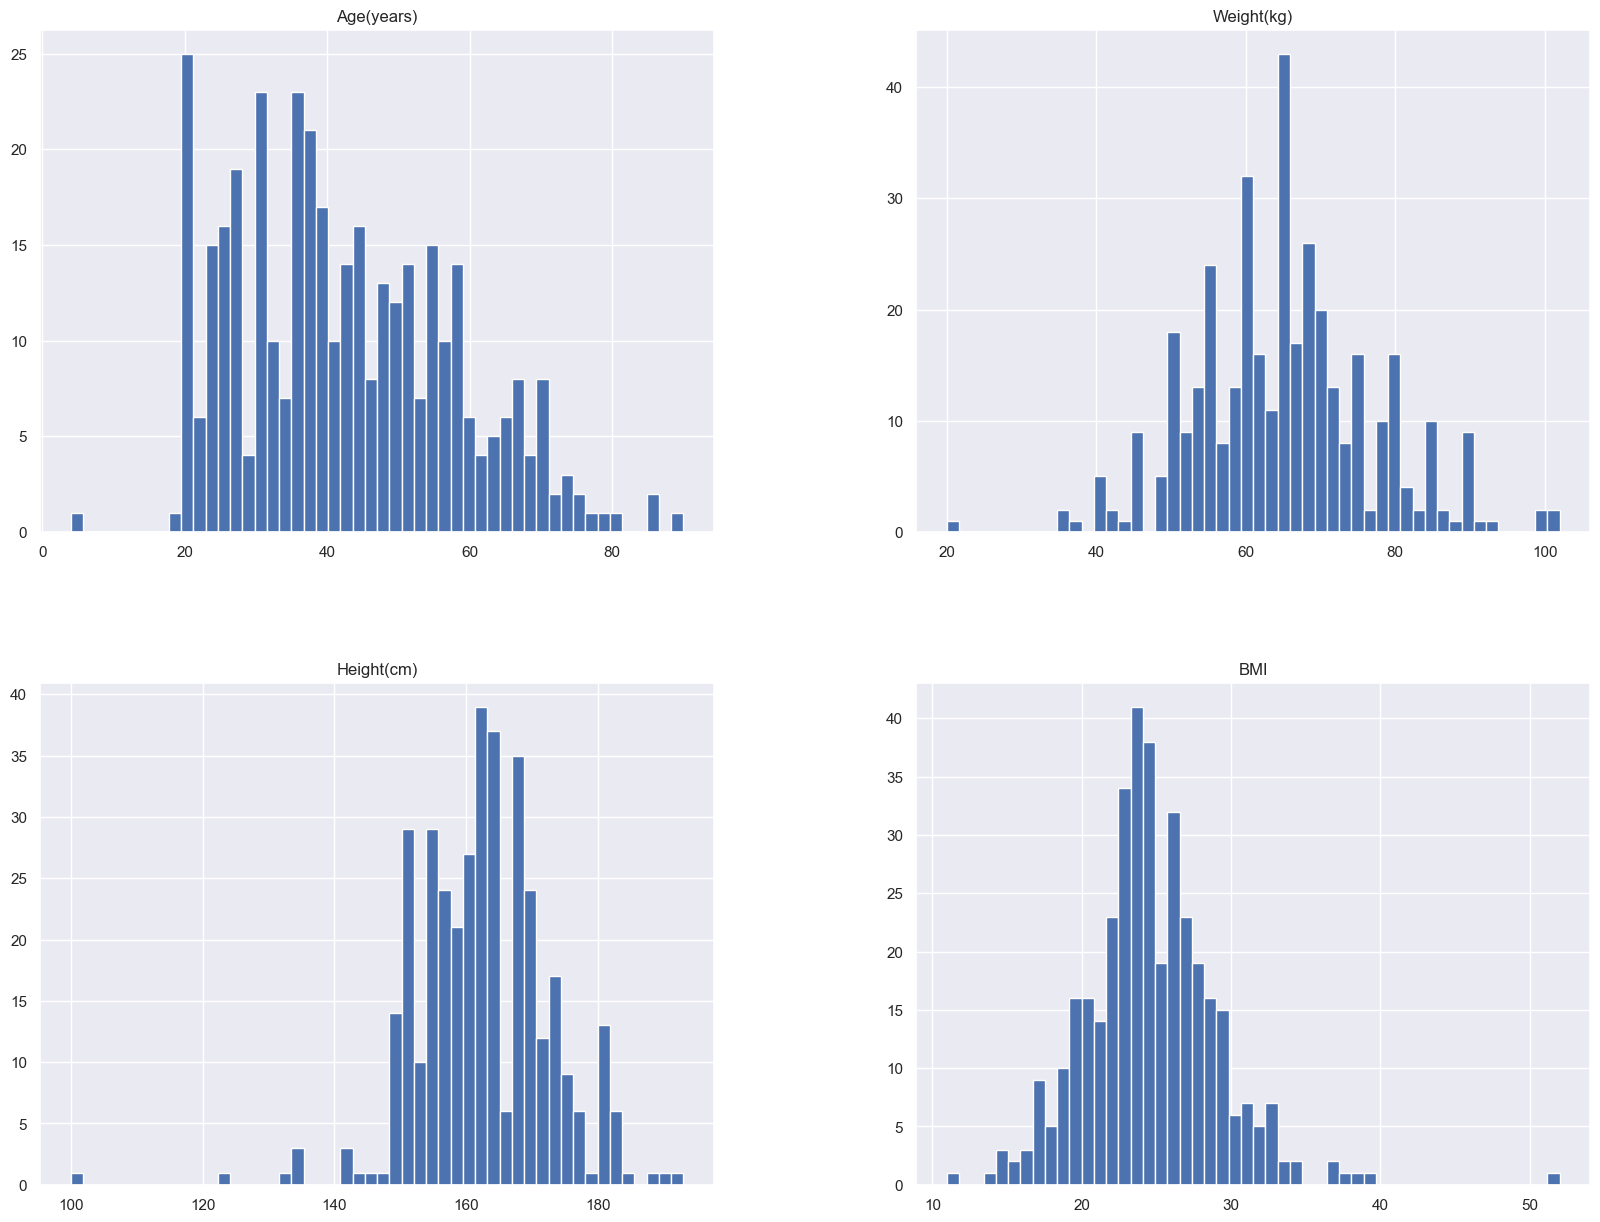

In [8]:
# Histogram:distribution of a single numerical variable
numerical_variables_df.hist(bins=50, figsize=(20, 15))
plt.show()

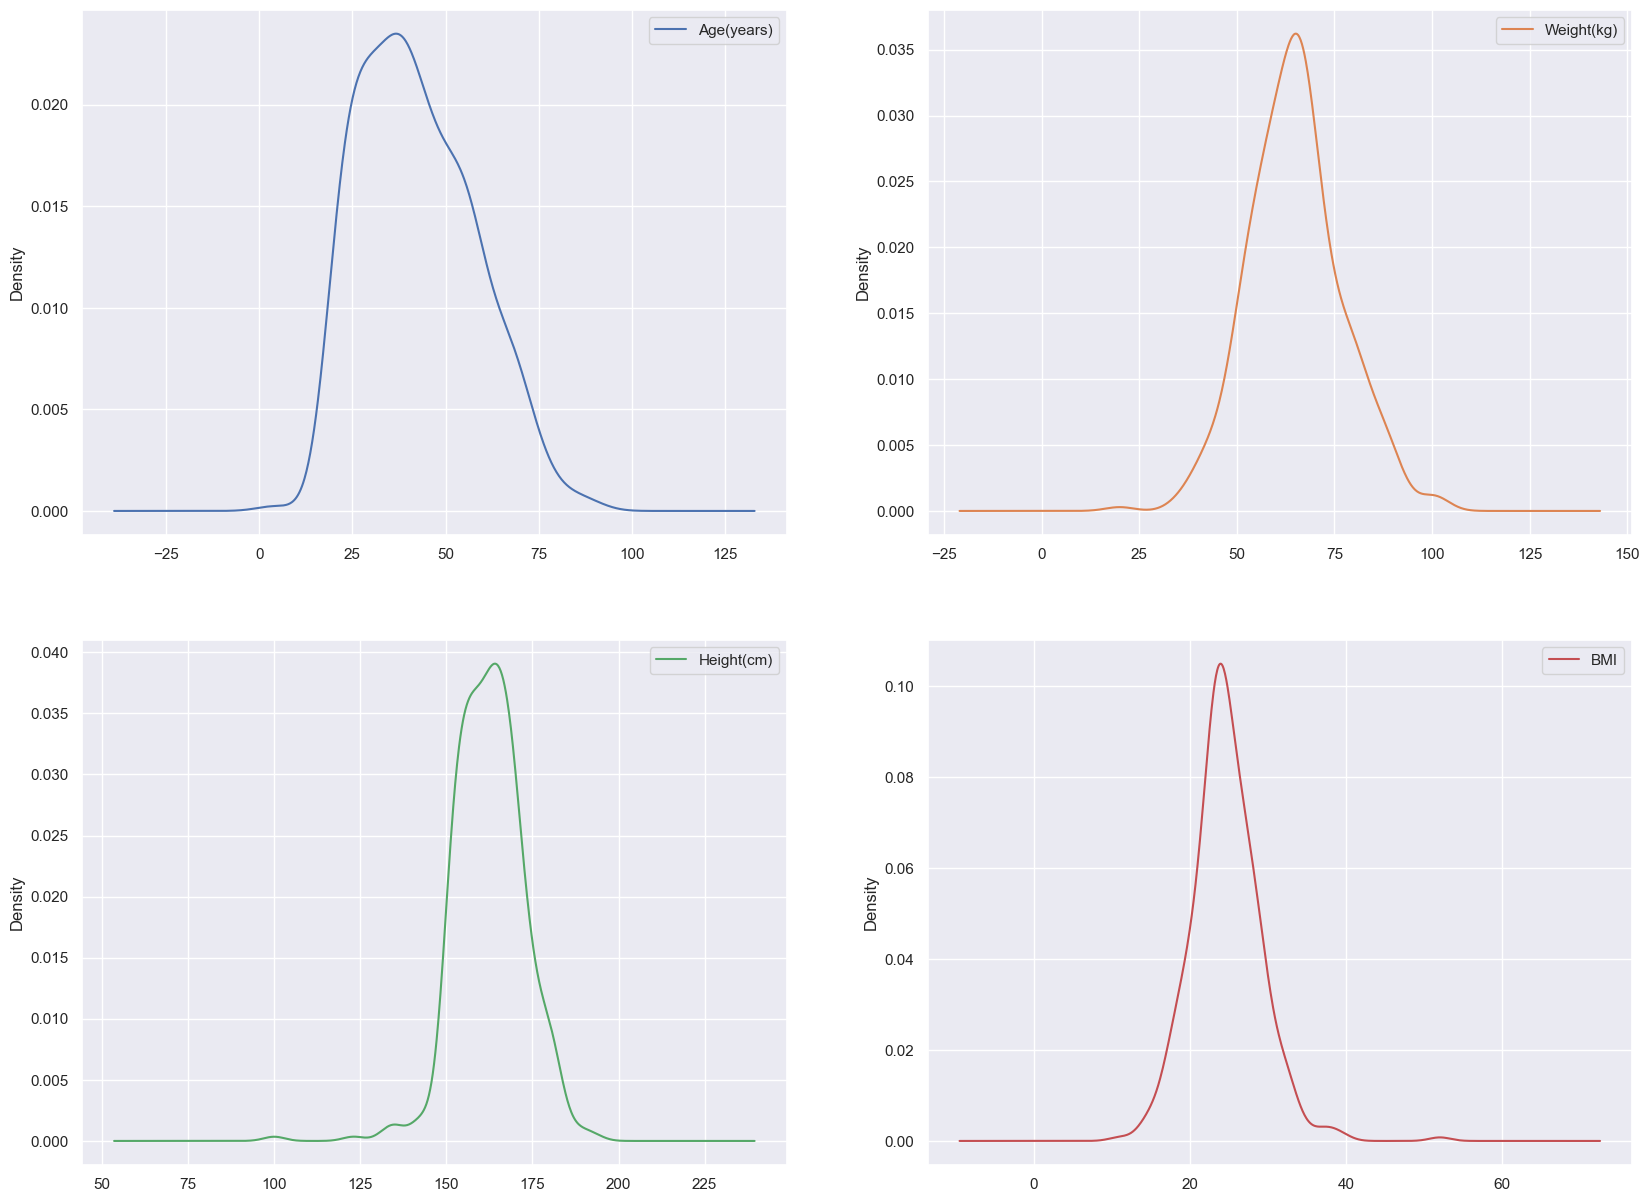

In [9]:
# Density plots for all attributes to visualize the distribution of each attribute
numerical_variables_df.plot(kind='density', subplots=True, layout=(2,2), figsize=(20, 15), sharex=False)
plt.show()

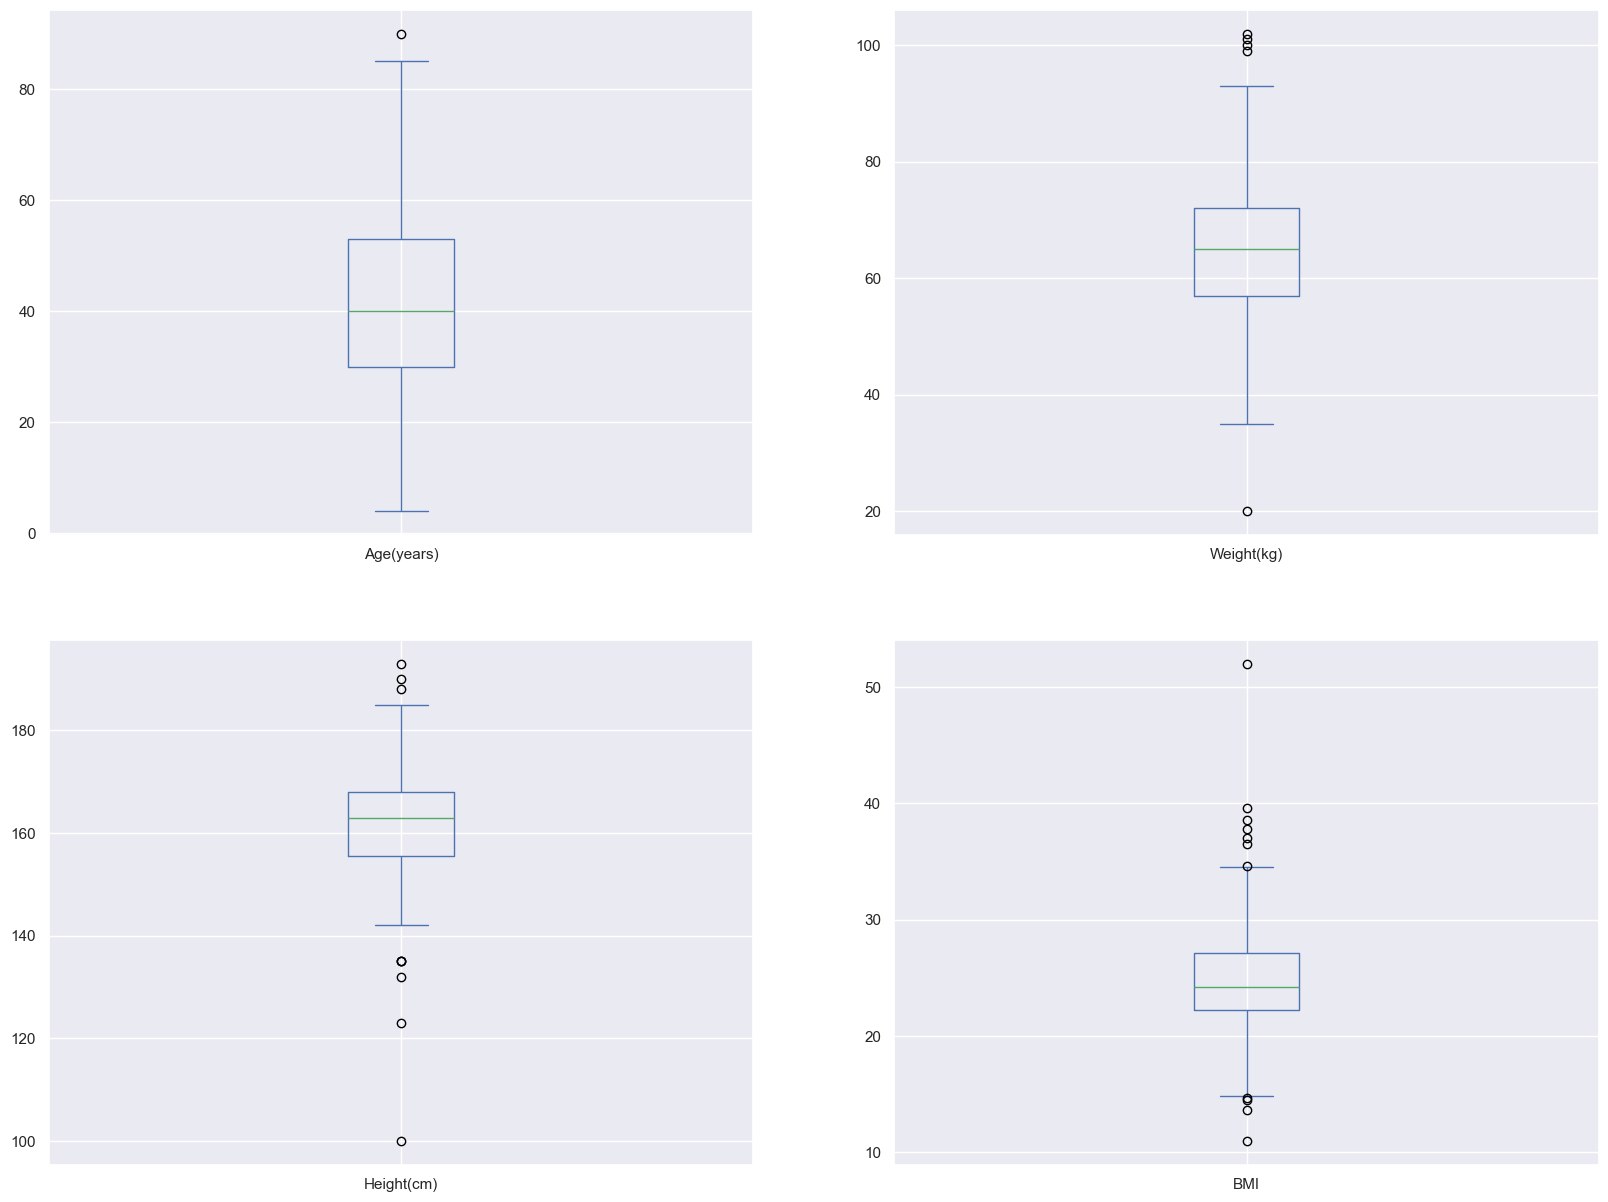

In [10]:
# Box Plot (Box-and-Whisker Plot): Summarizes the distribution of a numerical variable's
numerical_variables_df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(20,15))
plt.show()

### observation : outlier is detected in all features

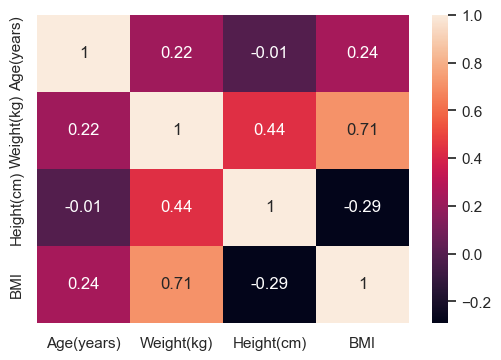

In [11]:
# Correlation between the different characteristics. Closer to 1 better is the correlation.
sns.heatmap(round(numerical_variables_df.corr(method='pearson'),2), annot = True)
plt.show()

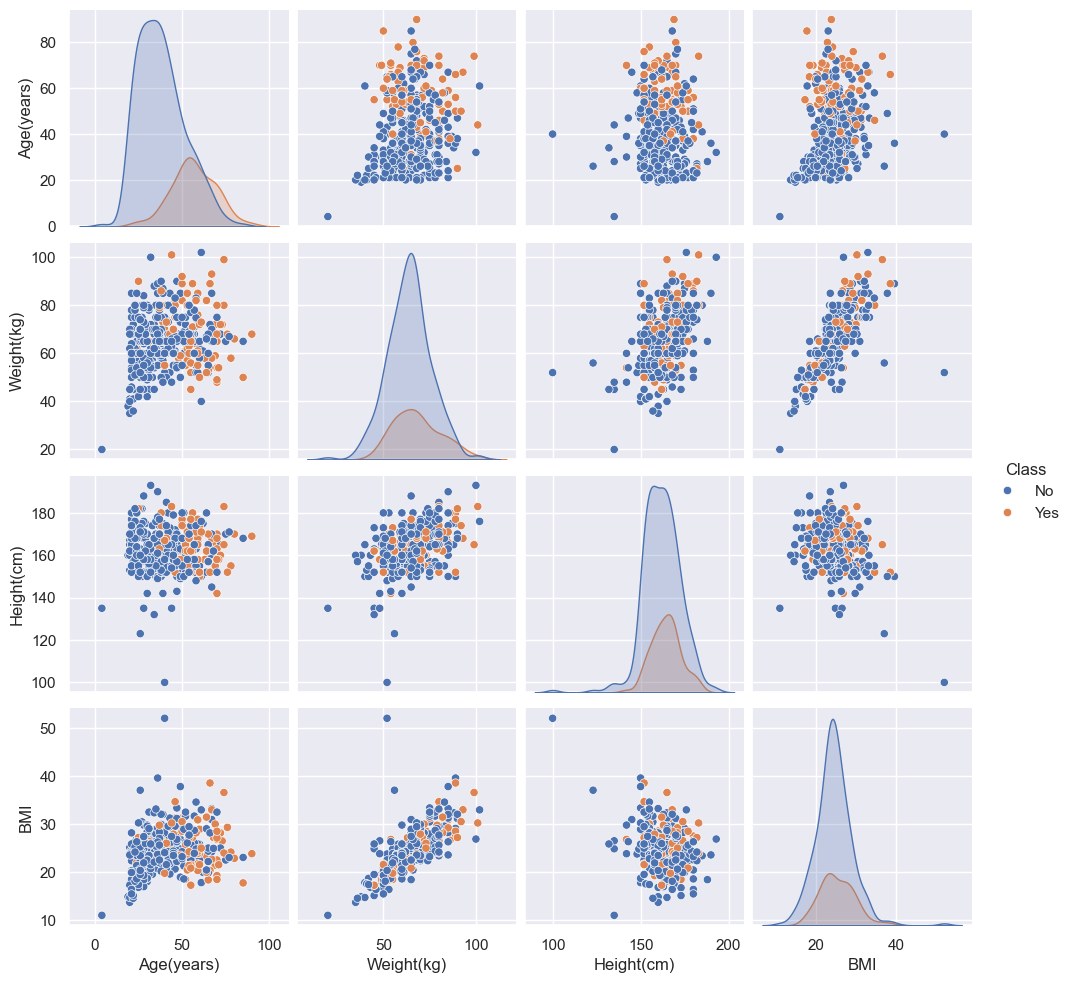

In [12]:
numerical_variables_df_class = pd.concat([numerical_variables_df, df['Class']], axis=1)
# Pairplot
sns.pairplot(numerical_variables_df_class, hue='Class')
plt.show()

In [13]:
# list of categorical variables
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print('Number of categorical variables: ', len(categorical_features))

categorical_variables_df = df[categorical_features]

# visualise the numerical variables
df[categorical_features].head()

Number of categorical variables:  31


,Gender,Profession,smoke,Exercise,cereal,salad,vegetables,grains,sweets,Sweets_in_a_week,...,Poor and unplanned work,Lack of career development,Feeling of powerlessness,Lack of financial security,Unable to satisfy all stakeholders,High_Blood_Pressure,Blood_Sugar_Fasting,Blood_Sugar_Post_Meal,HbA1c_Glycated_Haemoglobin,Class
0,Male,Sitting-Job,No,Moderate,Once,Everyday,Twice,Rice-Wheat,Yes,Weekly,...,Low,Low,Low,Low,Low,No,Low,Low,Low,No
1,Female,Other,No,Inactive,Twice,Rarely,Twice,Rice-Wheat-Maida,Yes,Weekly,...,Average,Average,Low,Low,Low,No,Moderate,Moderate,Moderate,No
2,Male,Moving-Job,Yes,Moderate,Twice,Rarely,Twice,Polished-Rice,Yes,Rarely,...,Very low,Very low,Very low,Very low,Very low,No,High,High,High,Yes
3,Male,Other,No,Low,Thrice,Sometimes,Twice,Wheat,Yes,Weekly,...,Average,Average,Very low,Average,Average,No,Low,Low,Low,No
4,Female,Moving-Job,No,Inactive,Twice,Everyday,Twice,Brown-Rice,Yes,Weekly,...,Very low,Very High,Average,Average,Low,No,Low,Low,Low,No


In [18]:
# for col in categorical_variables_df.columns:
#     print(f"Unique values in {col} is : {sorted(categorical_variables_df[col].unique())}, \
#         Count : {len(sorted(categorical_variables_df[col].unique()))} \n")

In [19]:
replacement_dict = {'other': 'Other'}
categorical_variables_df['Profession'].replace(replacement_dict, inplace=True)

replacement_dict = {'YES': 'Yes', 'yes': 'Yes'}
categorical_variables_df['smoke'].replace(replacement_dict, inplace=True)

replacement_dict = {'Thrice in a day': 'Thrice'}
categorical_variables_df['cereal'].replace(replacement_dict, inplace=True)

replacement_dict = {'None': 'Never', 'Rarely (Weekly)': 'Rarely', 'Sometimes': 'Rarely'}
categorical_variables_df['salad'].replace(replacement_dict, inplace=True)

replacement_dict = {'None': 'Never', 'Once in a week': 'Once', 'Sometimes': 'Rarely', 'Twice a day': 'Twice'}
categorical_variables_df['vegetables'].replace(replacement_dict, inplace=True)

replacement_dict = {' Low': 'Low', 'Very High': 'Very high'}
categorical_variables_df['Stress_Workload'].replace(replacement_dict, inplace=True)

replacement_dict = {'Very High': 'Very high'}
categorical_variables_df['Poor \nfamily income'].replace(replacement_dict, inplace=True)

replacement_dict = {'Very High': 'Very high'}
categorical_variables_df['Pressure of\n working'].replace(replacement_dict, inplace=True)

replacement_dict = {'Very High': 'Very high'}
categorical_variables_df['Frequent \ntravel'].replace(replacement_dict, inplace=True)

replacement_dict = {'Very High': 'Very high'}
categorical_variables_df['Monotonus\n work'].replace(replacement_dict, inplace=True)

replacement_dict = {'Very High': 'Very high'}
categorical_variables_df['Poor and unplanned work'].replace(replacement_dict, inplace=True)

replacement_dict = {'Very High': 'Very high'}
categorical_variables_df['Lack of career development'].replace(replacement_dict, inplace=True)

replacement_dict = {'Very High': 'Very high'}
categorical_variables_df['Feeling of powerlessness'].replace(replacement_dict, inplace=True)

replacement_dict = {'Very High': 'Very high'}
categorical_variables_df['Lack of financial security'].replace(replacement_dict, inplace=True)

replacement_dict = {'Very High': 'Very high'}
categorical_variables_df['Unable to satisfy all stakeholders'].replace(replacement_dict, inplace=True)

# for col in categorical_variables_df.columns:
#     print(f"Unique values in {col} is : {sorted(categorical_variables_df[col].unique())}, \
#           Count : {len(sorted(categorical_variables_df[col].unique()))} \n")

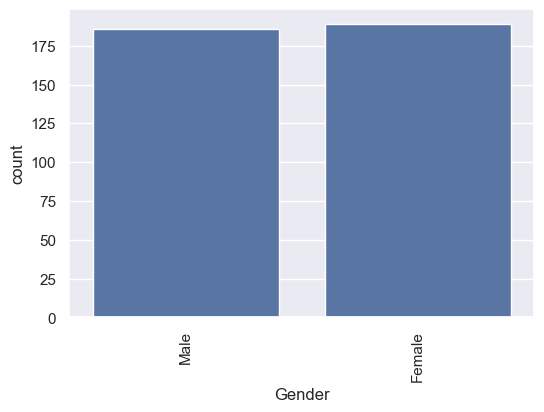

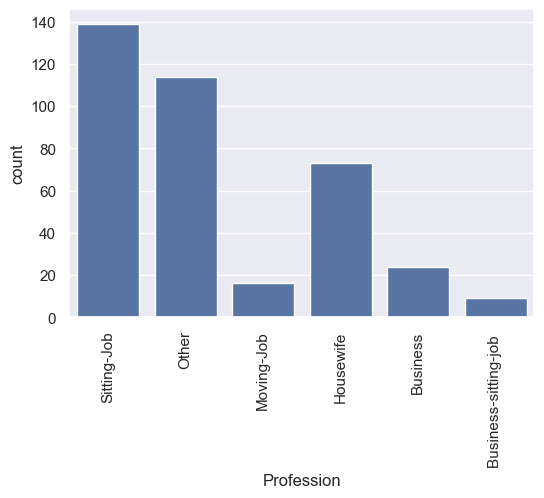

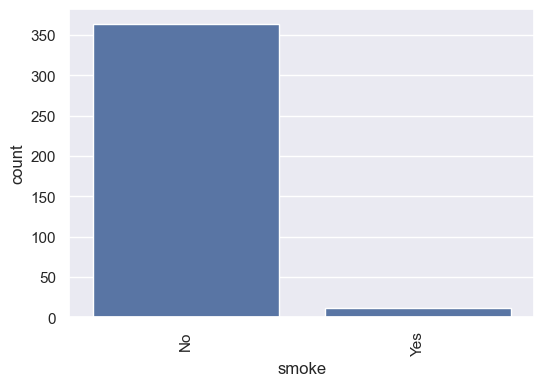

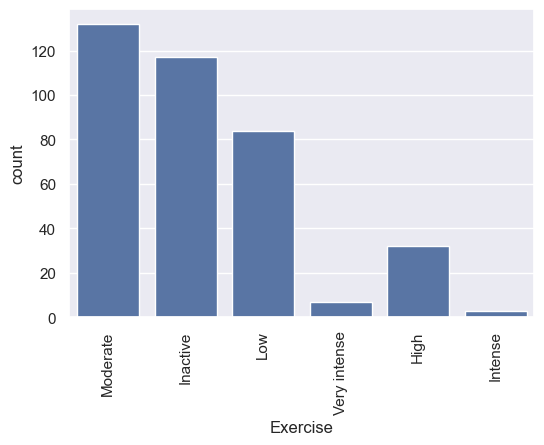

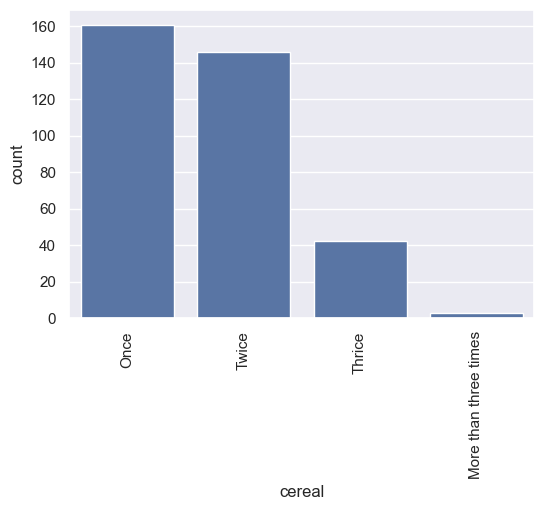

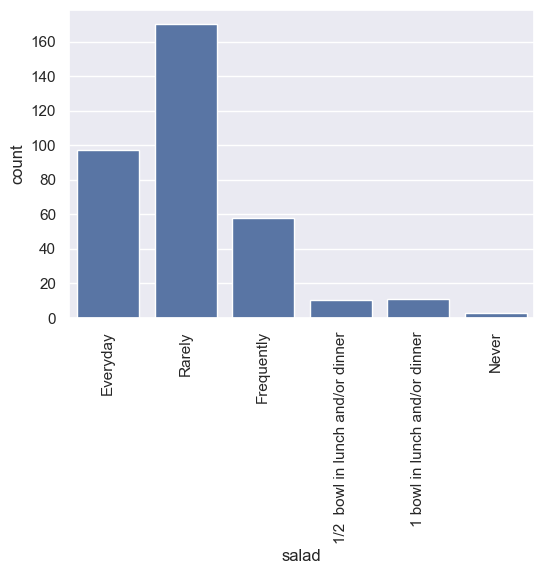

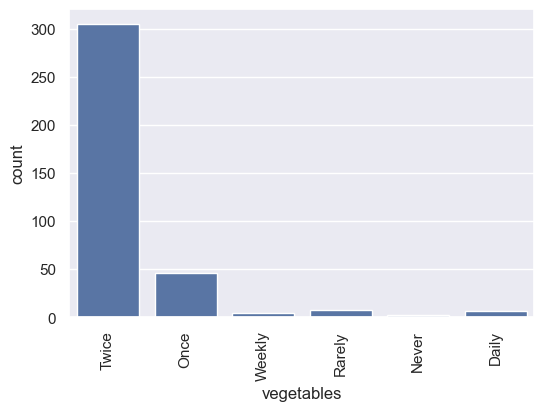

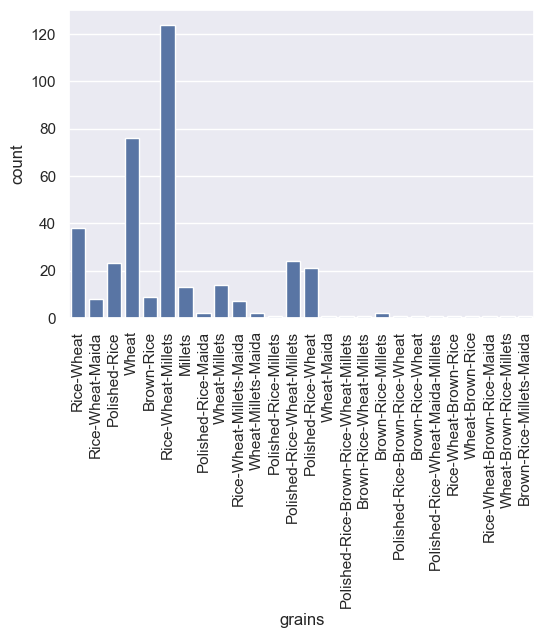

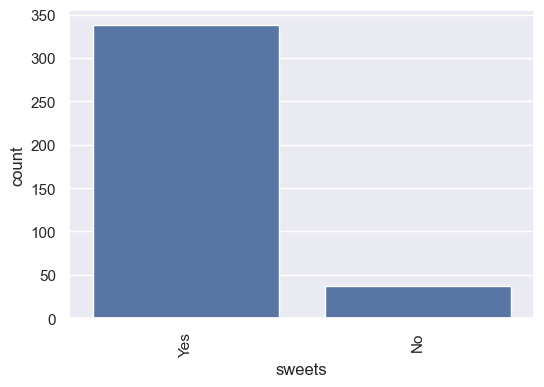

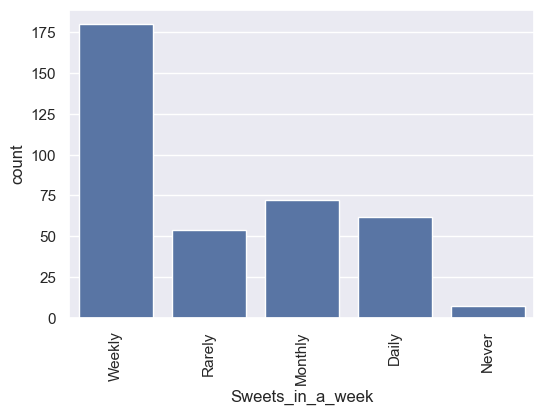

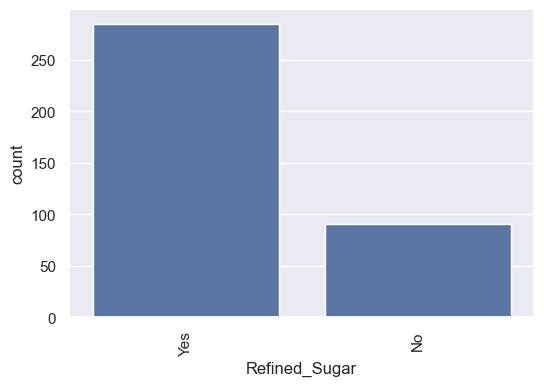

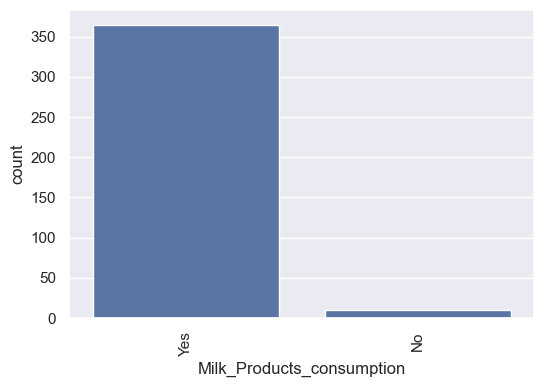

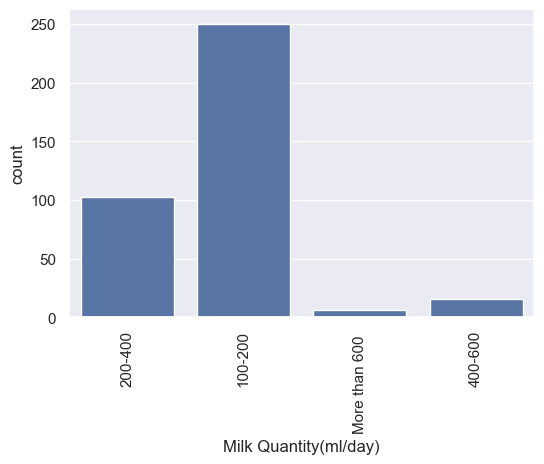

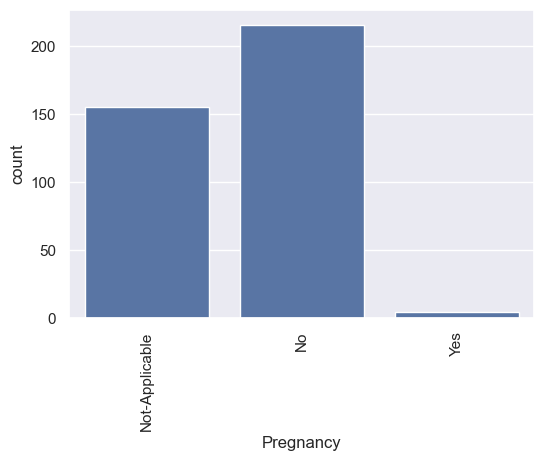

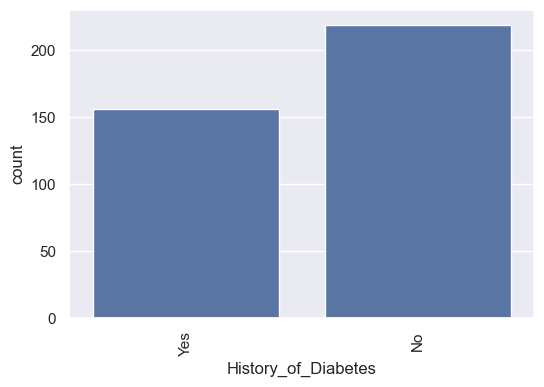

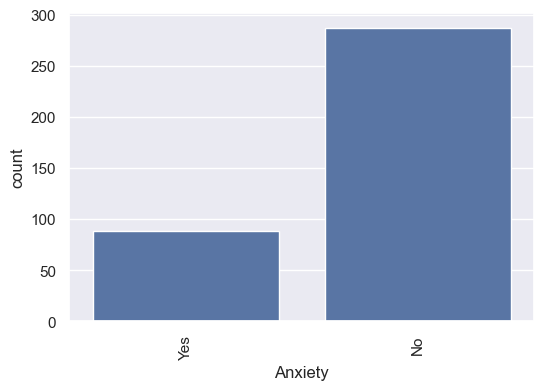

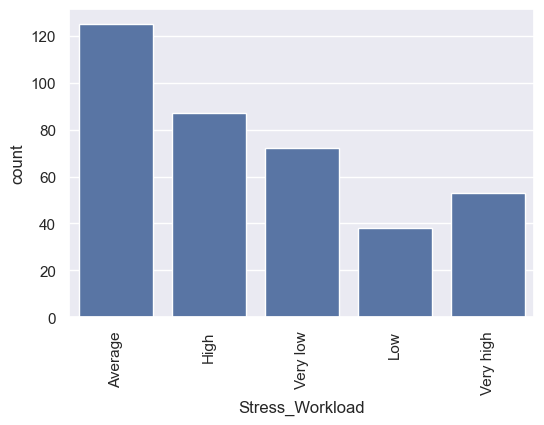

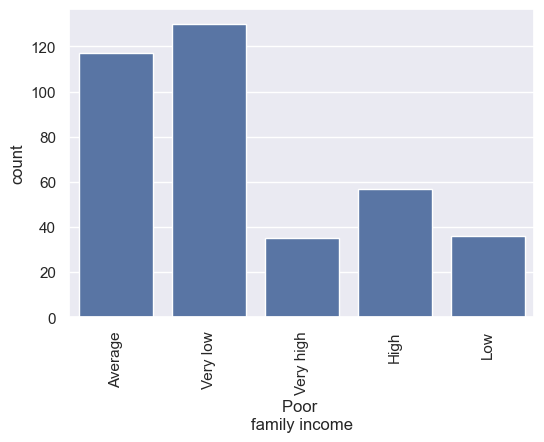

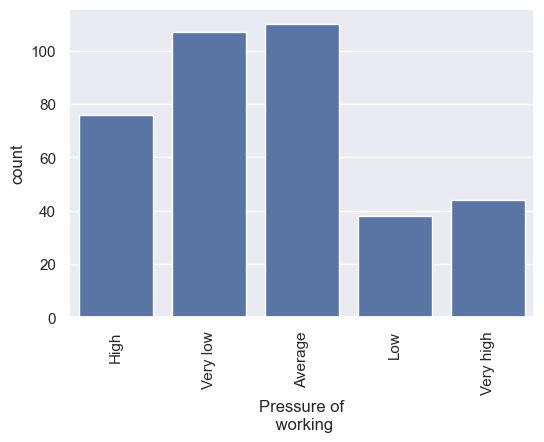

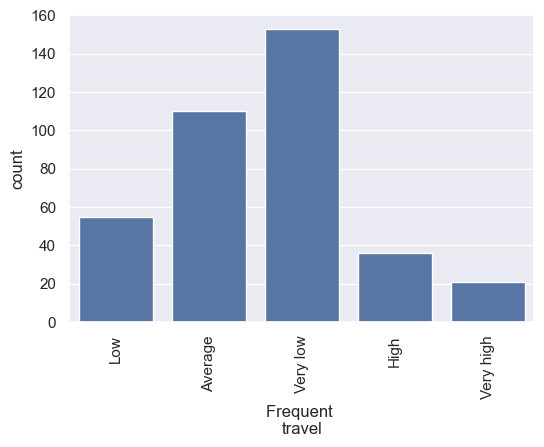

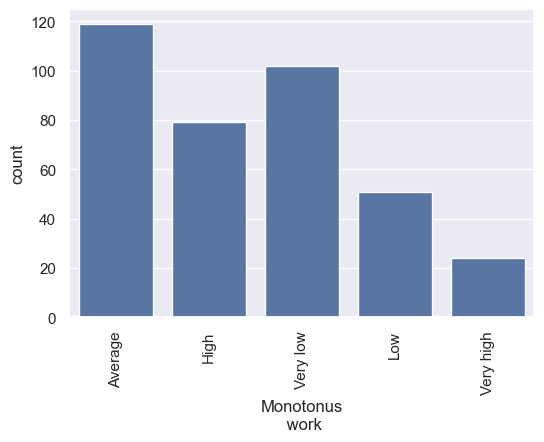

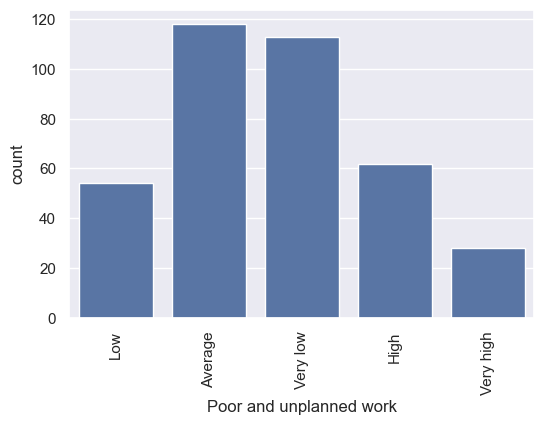

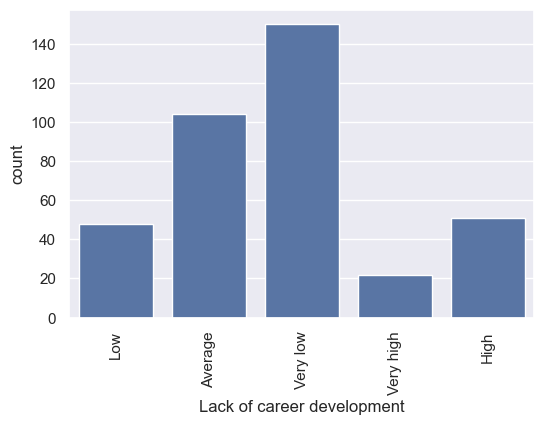

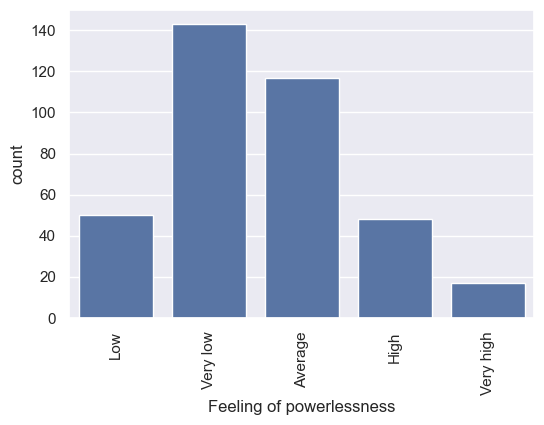

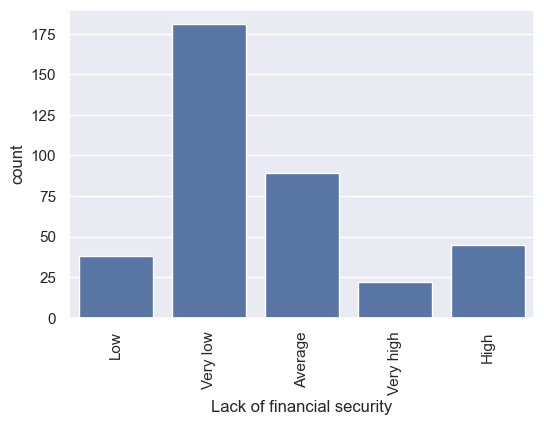

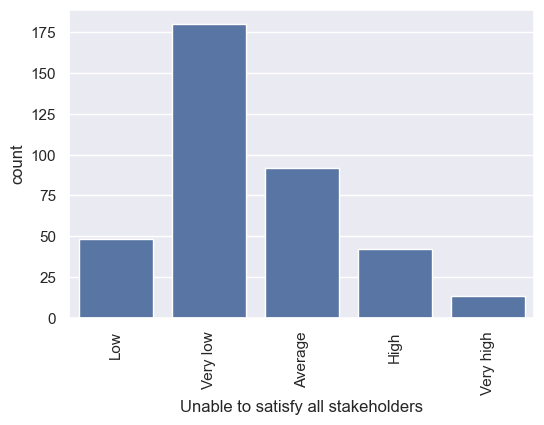

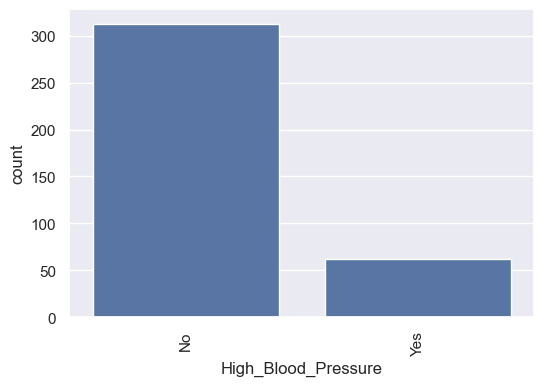

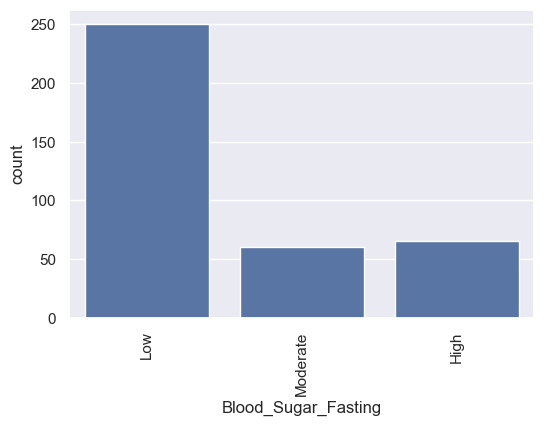

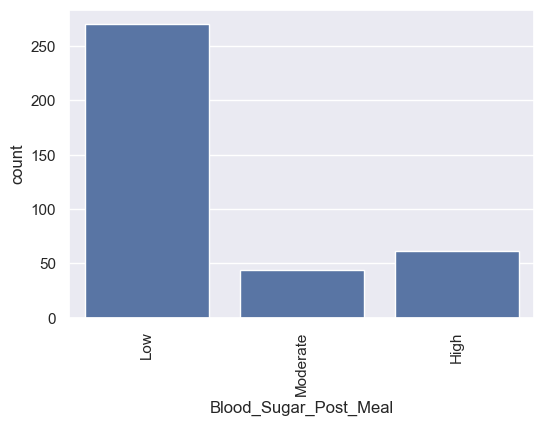

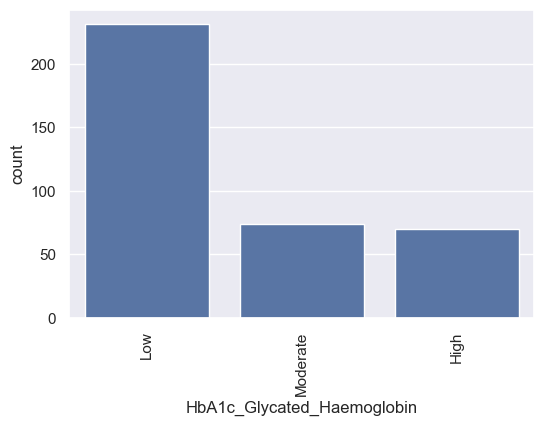

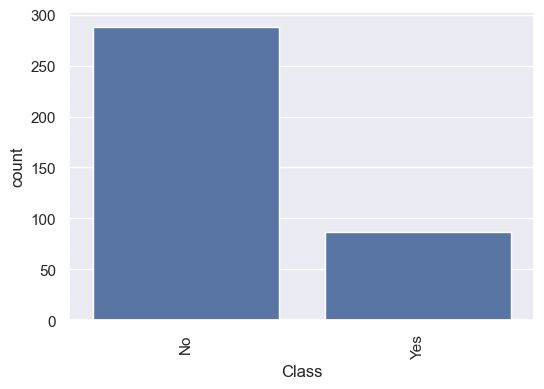

In [20]:
# Count Plot: Displays the count of occurrences for each category as bars.
for col in categorical_variables_df.columns:
    plt.xticks(rotation=90)
    sns.countplot(data=categorical_variables_df, x=col)
    plt.show()

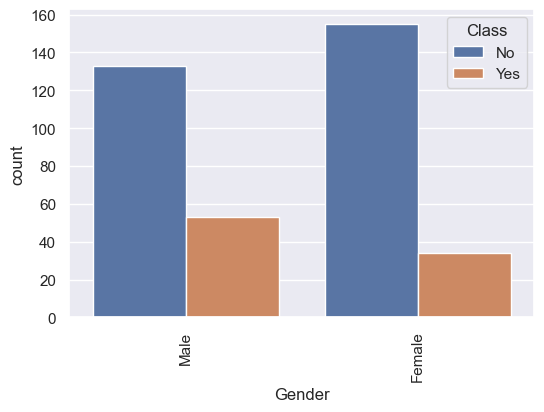

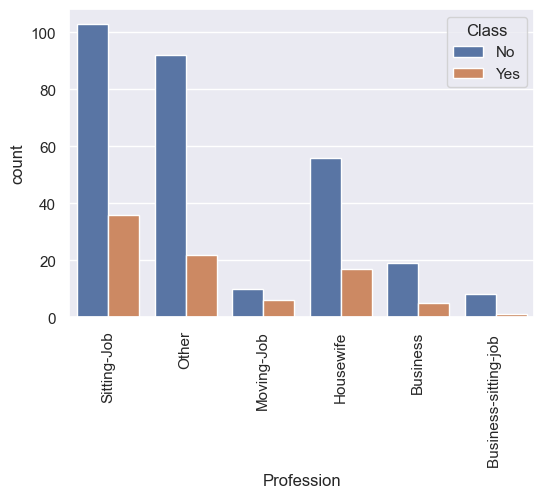

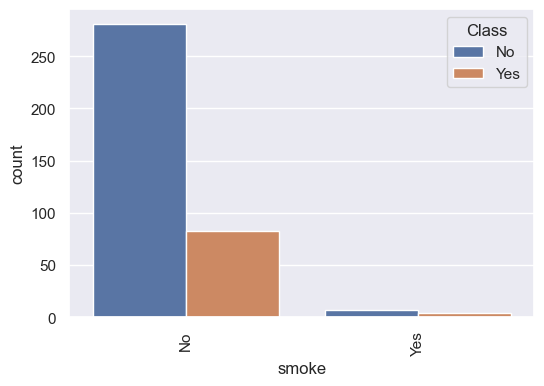

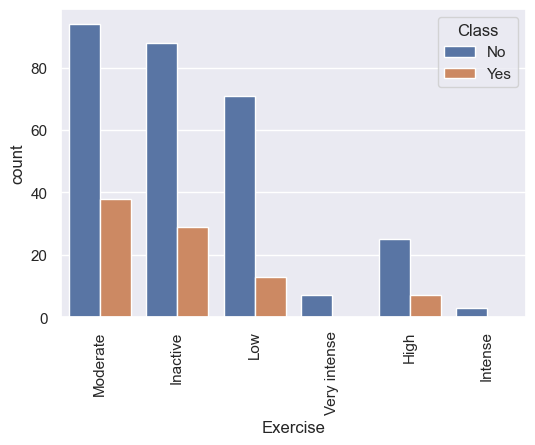

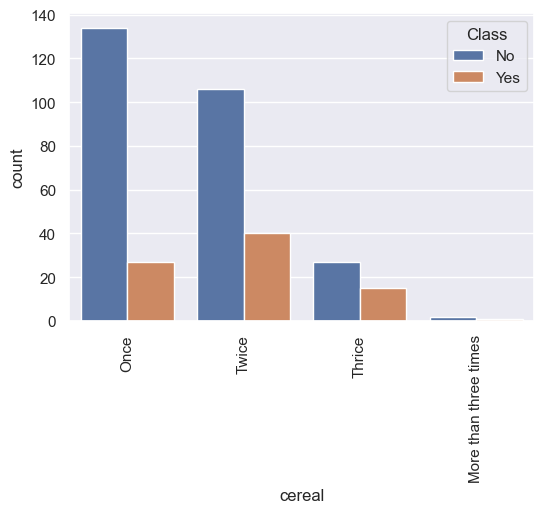

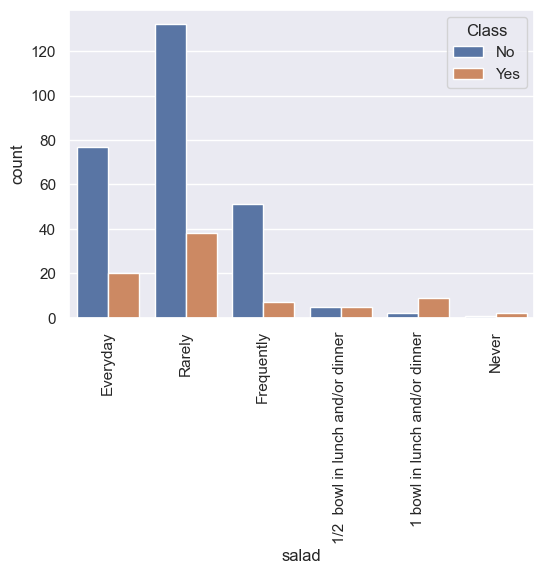

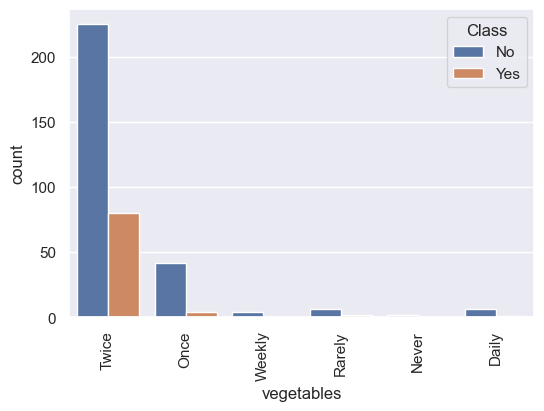

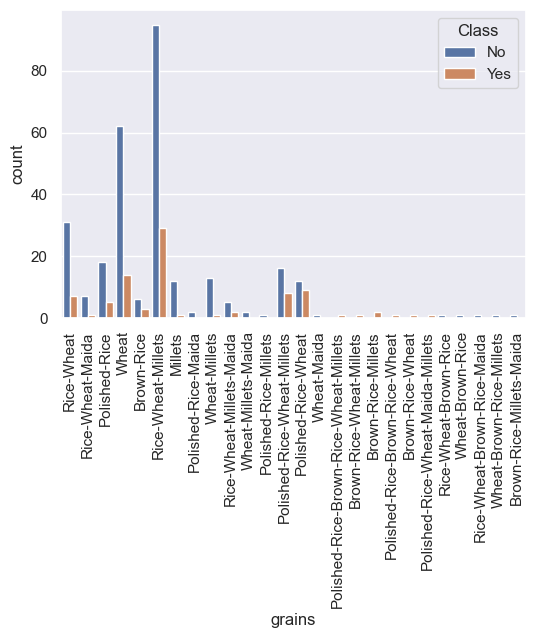

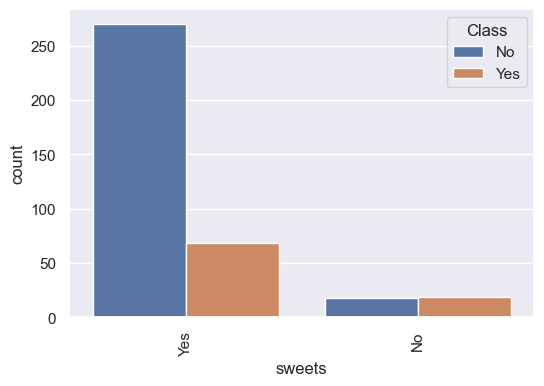

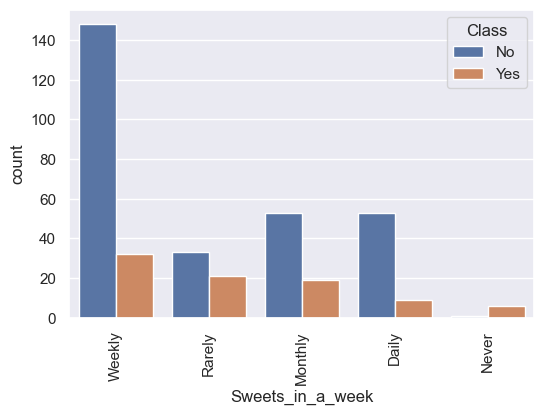

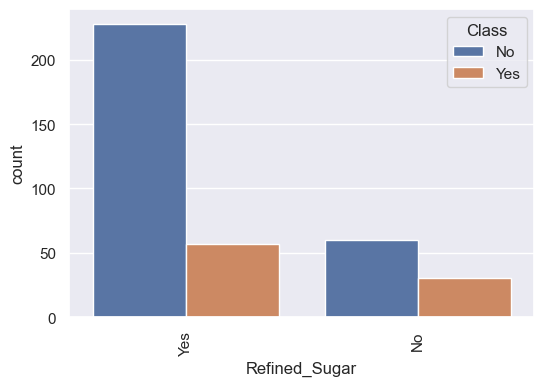

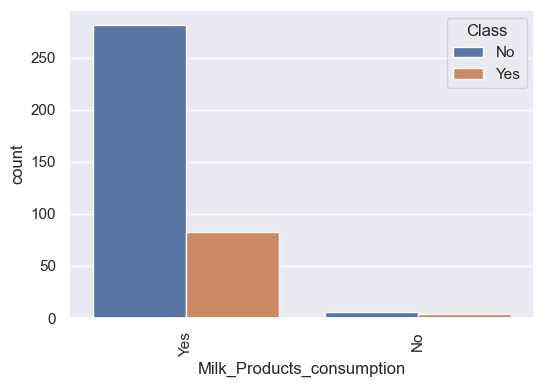

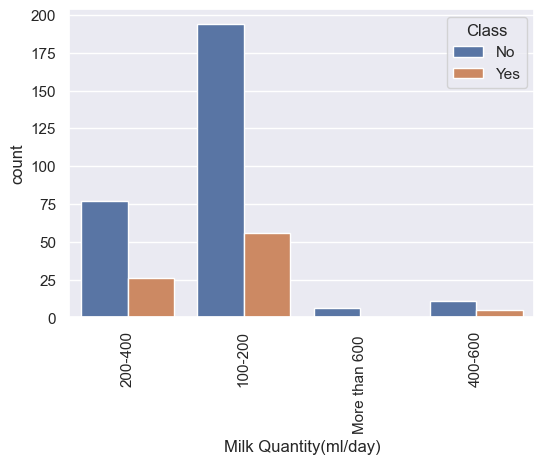

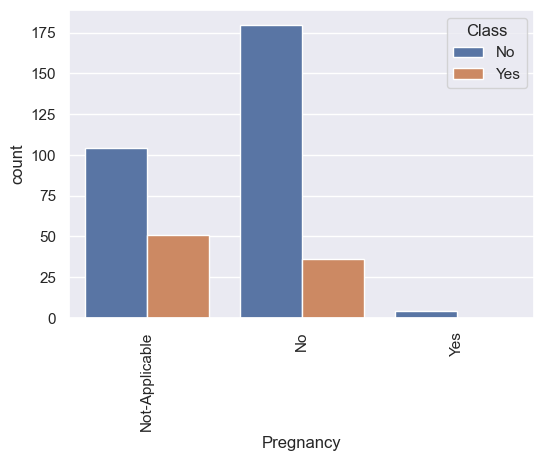

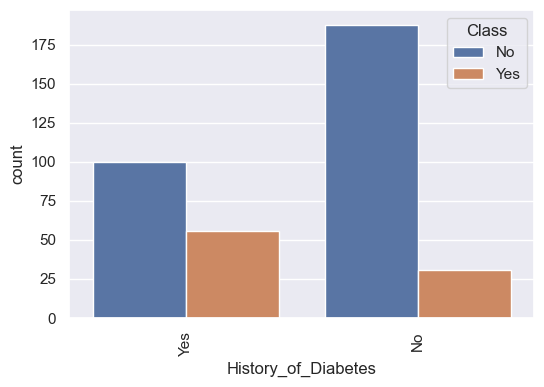

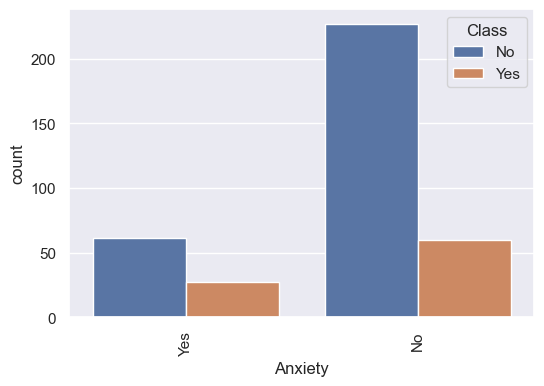

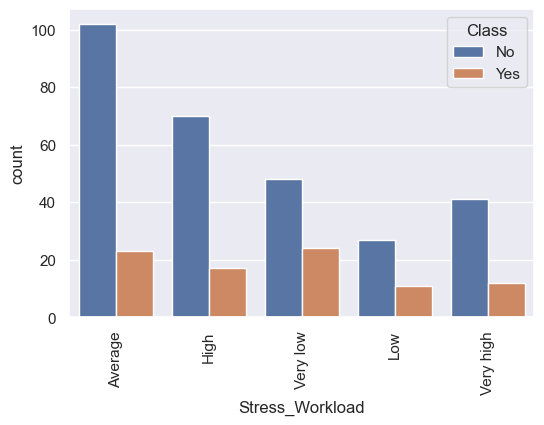

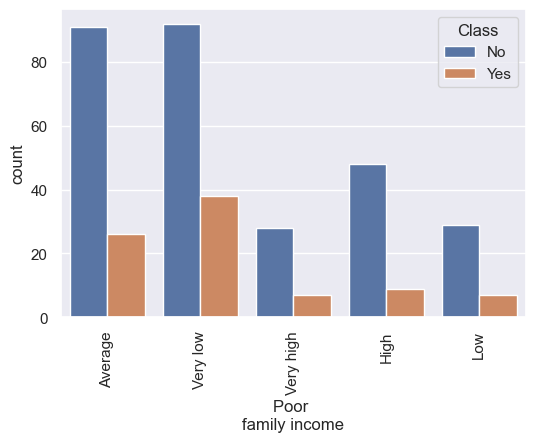

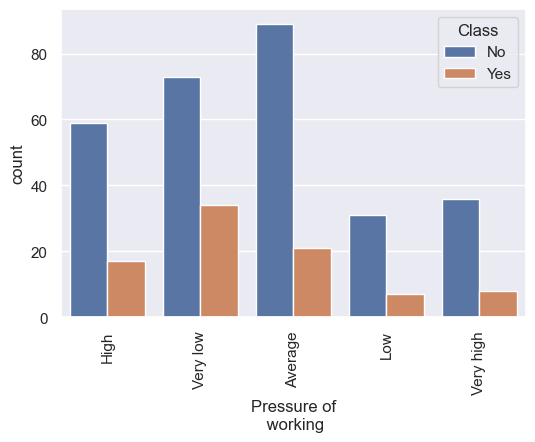

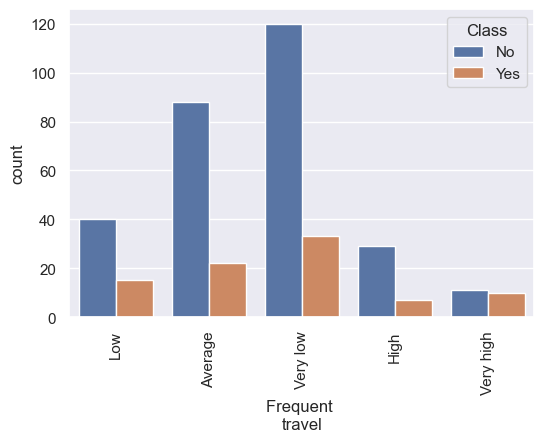

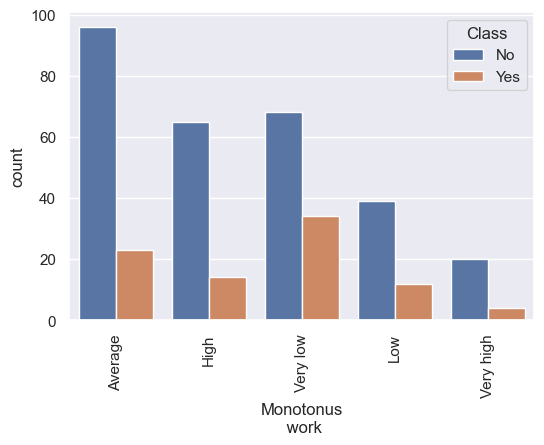

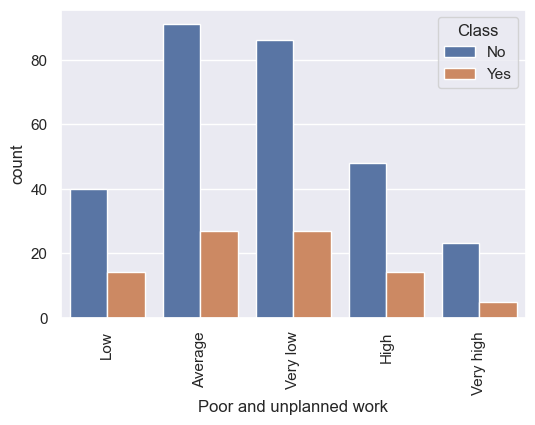

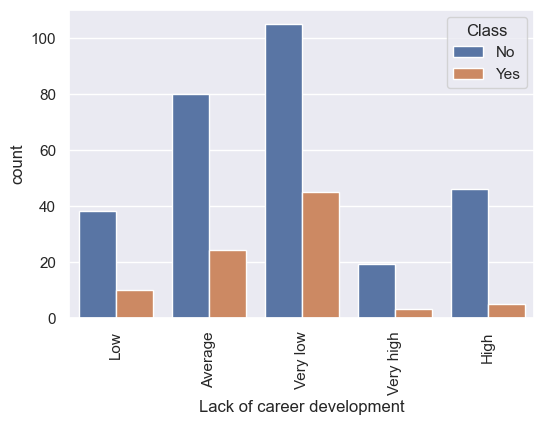

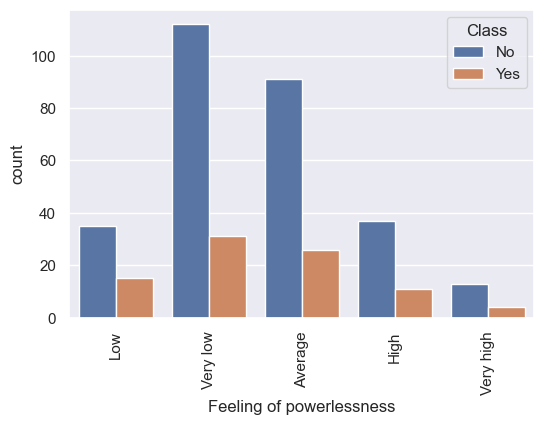

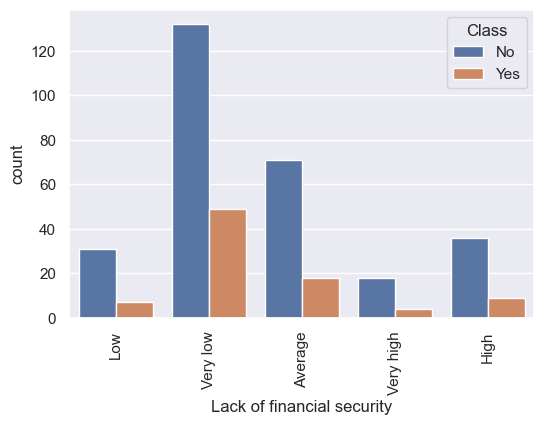

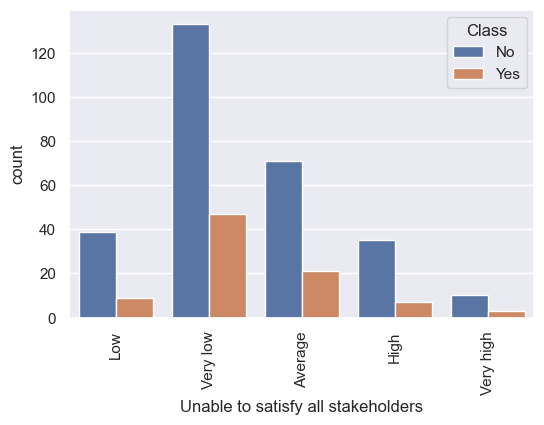

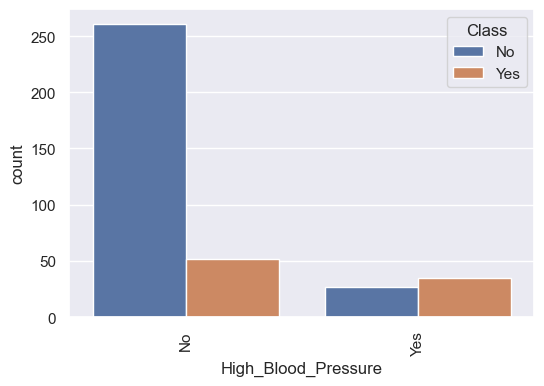

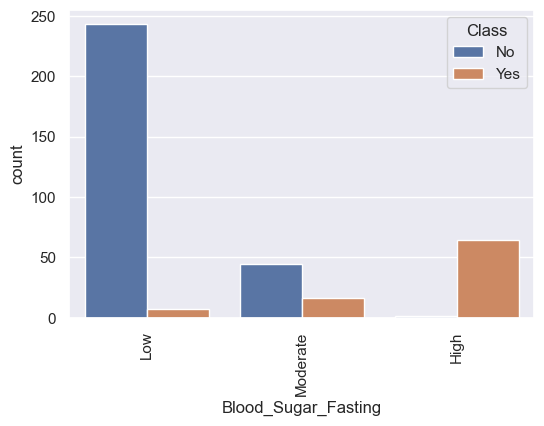

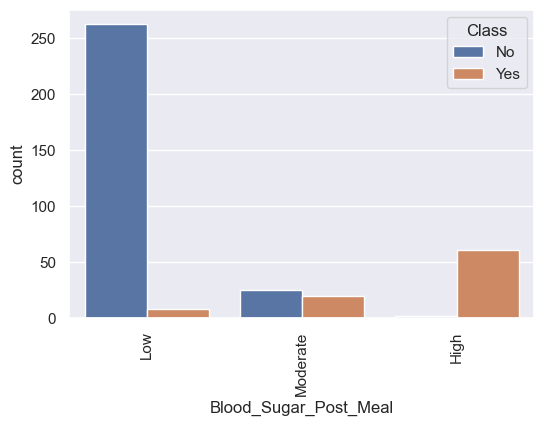

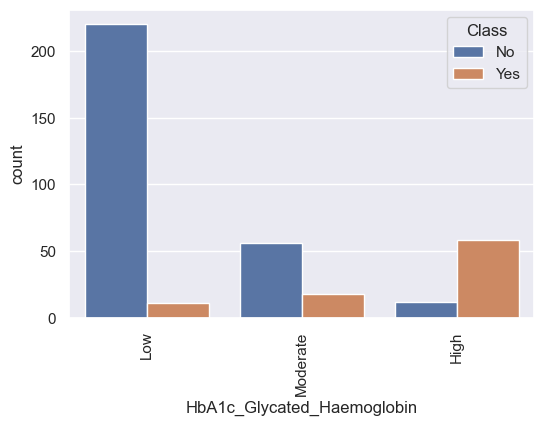

In [21]:
# Count Plot: Displays the count of occurrences for each category as bars.
for col in categorical_variables_df.columns[:-1]:
    plt.xticks(rotation=90)
    sns.countplot(data=categorical_variables_df, x=col, hue="Class")
    plt.show()

In [22]:
# LabelEncoder()
label_encoder = LabelEncoder()
for col in categorical_variables_df.columns:
    # Encode labels in column
    categorical_variables_df[col] = label_encoder.fit_transform(categorical_variables_df[col])

In [23]:
categorical_variables_df.head()

,Gender,Profession,smoke,Exercise,cereal,salad,vegetables,grains,sweets,Sweets_in_a_week,...,Poor and unplanned work,Lack of career development,Feeling of powerlessness,Lack of financial security,Unable to satisfy all stakeholders,High_Blood_Pressure,Blood_Sugar_Fasting,Blood_Sugar_Post_Meal,HbA1c_Glycated_Haemoglobin,Class
0,1,5,0,4,1,2,4,14,1,4,...,2,2,2,2,2,0,1,1,1,0
1,0,4,0,1,3,5,4,17,1,4,...,0,0,2,2,2,0,2,2,2,0
2,1,3,1,4,3,5,4,6,1,3,...,4,4,4,4,4,0,0,0,0,1
3,1,4,0,3,2,5,4,20,1,4,...,0,0,4,0,0,0,1,1,1,0
4,0,3,0,1,3,2,4,0,1,4,...,4,3,0,0,2,0,1,1,1,0


In [24]:
dataset = pd.concat([numerical_variables_df, categorical_variables_df], axis=1)
dataset.head()

,Age(years),Weight(kg),Height(cm),BMI,Gender,Profession,smoke,Exercise,cereal,salad,...,Poor and unplanned work,Lack of career development,Feeling of powerlessness,Lack of financial security,Unable to satisfy all stakeholders,High_Blood_Pressure,Blood_Sugar_Fasting,Blood_Sugar_Post_Meal,HbA1c_Glycated_Haemoglobin,Class
0,42,61.0,165,22.41,1,5,0,4,1,2,...,2,2,2,2,2,0,1,1,1,0
1,30,49.0,165,18.00,0,4,0,1,3,5,...,0,0,2,2,2,0,2,2,2,0
2,52,60.0,159,23.73,1,3,1,4,3,5,...,4,4,4,4,4,0,0,0,0,1
3,46,61.0,172,20.62,1,4,0,3,2,5,...,0,0,4,0,0,0,1,1,1,0
4,45,65.0,155,27.06,0,3,0,1,3,2,...,4,3,0,0,2,0,1,1,1,0


In [25]:
X, Y = dataset.drop(['Class'], axis = 1),  dataset['Class']
# train_test_split 80/20
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42, stratify = Y)

In [28]:
# Model initialization
lr_Classifier = LogisticRegression()
knn_Classifier = KNeighborsClassifier()
gnb_Classifier = GaussianNB()
dt_Classifier = DecisionTreeClassifier()
rf_Classifier = RandomForestClassifier()
svm_Classifier = SVC()
lr_Regression = LinearRegression()
model_list = [lr_Classifier, knn_Classifier, gnb_Classifier, dt_Classifier, 
              rf_Classifier, svm_Classifier, lr_Regression]

# Scaler initialization
MinMax_scaler = MinMaxScaler()
Standard_scaler = StandardScaler()
MaxAbs_scaler = MaxAbsScaler()
Robust_scaler = RobustScaler()
Quantile_scaler = QuantileTransformer()
Power_scaler = PowerTransformer()
Normalizer_scaler = Normalizer()
scaler_list = [MinMax_scaler, Standard_scaler, MaxAbs_scaler, Robust_scaler, 
               Quantile_scaler, Power_scaler, Normalizer_scaler]

In [29]:
def run_pipeline(X_train, X_test, y_train, y_test, scaler, classifier):
    # Model Information
    print(f"Modele name : {type(classifier).__name__}")
    print(f"Scaler name : {type(scaler).__name__}")
    
    # process 1 : fit and transform X_train data
    scaled_X_train = scaler.fit_transform(X_train)
    
    # process 2 : train model
    classifier.fit(scaled_X_train, y_train)   
    
    # process 3 : transform X_test data
    scaled_X_test = scaler.transform(X_test)
    
    # process 4 : test model
    y_pred = classifier.predict(scaled_X_test)
    # print(y_pred, le.inverse_transform(y_pred))
    
    # process 5 : Perform k-fold cross-validation using cross_val_score
    try:
        scores = cross_val_score(classifier, scaled_X_train, y_train, cv=10, scoring='accuracy')
        print(f"10 K-Fold Accuracy_score : {np.round_(scores,4)}")
        print(f"10 K-Fold Average Accuracy_score : {round(np.average(scores)*100,2)} %")
    except Exception as e:
        pass
    
    # process 6 : model evalution
    try:
        print("Accuracy_score:", round((accuracy_score(y_test, y_pred))*100,2),'%')
        print("Loss:", round((1-accuracy_score(y_test, y_pred))*100,2),'%')
        print("Cohen_kappa_score:", round((cohen_kappa_score(y_test, y_pred))*100,2),'%')
        print("Classification_report:\n",metrics.classification_report(y_test, y_pred))
        print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))
        # plot confusion_matrix
        fig, ax = plt.subplots()
        fig.set_size_inches(6,4) # WH
        sns.heatmap(confusion_matrix(y_test, y_pred), 
                    annot=True,
                    fmt=".1f",
                    linewidths = 2,
                    linecolor = "blue",
                    center=0)
        plt.show()
    except Exception as e:
        pass
    print("Root Mean Square Error (RMSE):", round(sqrt(mean_squared_error(y_test, y_pred)), 4))
    
    # process 7 : save model in pkl file
    filename = f'Moduls\\{str(type(classifier).__name__)}_{str(type(scaler).__name__)}_01_LS_Disease_Prediction.pkl'
    pickle.dump(classifier, open(filename, 'wb'))
    
    # collect data for bar plot
    try:
        global plot_data_list
        plot_data_list.append([str(type(classifier).__name__), 
                               str(type(scaler).__name__), 
                               round((accuracy_score(y_test, y_pred))*100,2)])
    except Exception as e:
        pass
        
    # collect data for bar plot (RSME)
    global plot_RSME_list
    plot_RSME_list.append([str(type(classifier).__name__), 
                           str(type(scaler).__name__), 
                           round(sqrt(mean_squared_error(y_test, y_pred)), 4)])
    
    # end 
    print("==="*30)
    print("\n\n")
    time.sleep(0.5)

Modele name : LogisticRegression
Scaler name : MinMaxScaler
10 K-Fold Accuracy_score : [0.9667 0.9    0.9    0.9    0.8667 0.8667 0.8667 0.9    0.8667 0.8667]
10 K-Fold Average Accuracy_score : 89.0 %
Accuracy_score: 88.0 %
Loss: 12.0 %
Cohen_kappa_score: 61.8 %
Classification_report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        58
           1       0.83      0.59      0.69        17

    accuracy                           0.88        75
   macro avg       0.86      0.78      0.81        75
weighted avg       0.88      0.88      0.87        75

confusion_matrix:
 [[56  2]
 [ 7 10]]


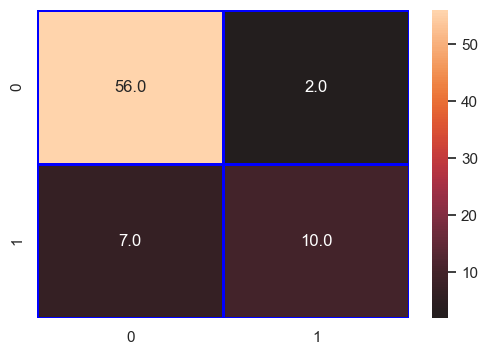

Root Mean Square Error (RMSE): 0.3464



Modele name : LogisticRegression
Scaler name : StandardScaler
10 K-Fold Accuracy_score : [0.9667 0.9333 0.8667 0.8667 0.8667 0.8667 0.8333 0.9    0.8    0.8667]
10 K-Fold Average Accuracy_score : 87.67 %
Accuracy_score: 89.33 %
Loss: 10.67 %
Cohen_kappa_score: 66.81 %
Classification_report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93        58
           1       0.85      0.65      0.73        17

    accuracy                           0.89        75
   macro avg       0.87      0.81      0.83        75
weighted avg       0.89      0.89      0.89        75

confusion_matrix:
 [[56  2]
 [ 6 11]]


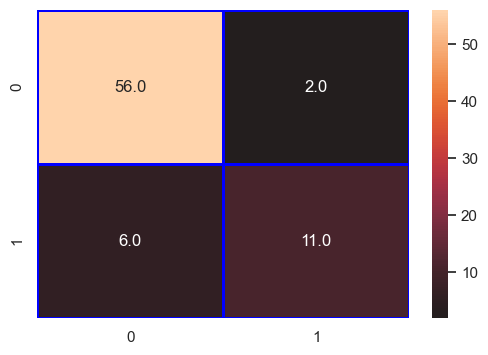

Root Mean Square Error (RMSE): 0.3266



Modele name : LogisticRegression
Scaler name : MaxAbsScaler
10 K-Fold Accuracy_score : [0.9333 0.9    0.9    0.8667 0.9    0.8667 0.8667 0.9    0.8667 0.8333]
10 K-Fold Average Accuracy_score : 88.33 %
Accuracy_score: 88.0 %
Loss: 12.0 %
Cohen_kappa_score: 61.8 %
Classification_report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        58
           1       0.83      0.59      0.69        17

    accuracy                           0.88        75
   macro avg       0.86      0.78      0.81        75
weighted avg       0.88      0.88      0.87        75

confusion_matrix:
 [[56  2]
 [ 7 10]]


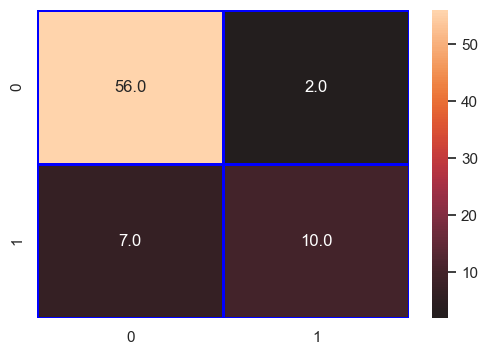

Root Mean Square Error (RMSE): 0.3464



Modele name : LogisticRegression
Scaler name : RobustScaler
10 K-Fold Accuracy_score : [0.9667 0.9    0.9    0.8667 0.9    0.8667 0.8667 0.9    0.8    0.8667]
10 K-Fold Average Accuracy_score : 88.33 %
Accuracy_score: 86.67 %
Loss: 13.33 %
Cohen_kappa_score: 56.55 %
Classification_report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92        58
           1       0.82      0.53      0.64        17

    accuracy                           0.87        75
   macro avg       0.85      0.75      0.78        75
weighted avg       0.86      0.87      0.86        75

confusion_matrix:
 [[56  2]
 [ 8  9]]


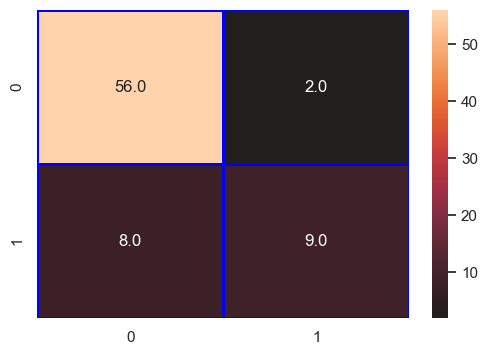

Root Mean Square Error (RMSE): 0.3651



Modele name : LogisticRegression
Scaler name : QuantileTransformer
10 K-Fold Accuracy_score : [0.9    0.9    0.8667 0.9    0.8667 0.8667 0.8667 0.9    0.8667 0.8667]
10 K-Fold Average Accuracy_score : 88.0 %
Accuracy_score: 88.0 %
Loss: 12.0 %
Cohen_kappa_score: 61.8 %
Classification_report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        58
           1       0.83      0.59      0.69        17

    accuracy                           0.88        75
   macro avg       0.86      0.78      0.81        75
weighted avg       0.88      0.88      0.87        75

confusion_matrix:
 [[56  2]
 [ 7 10]]


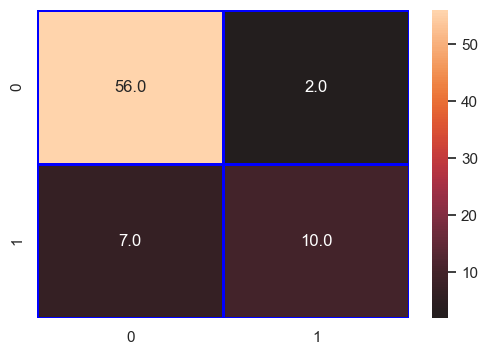

Root Mean Square Error (RMSE): 0.3464



Modele name : LogisticRegression
Scaler name : PowerTransformer
10 K-Fold Accuracy_score : [0.9667 0.9667 0.9    0.8667 0.8667 0.8667 0.8333 0.8667 0.8333 0.8667]
10 K-Fold Average Accuracy_score : 88.33 %
Accuracy_score: 88.0 %
Loss: 12.0 %
Cohen_kappa_score: 63.49 %
Classification_report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92        58
           1       0.79      0.65      0.71        17

    accuracy                           0.88        75
   macro avg       0.84      0.80      0.82        75
weighted avg       0.88      0.88      0.88        75

confusion_matrix:
 [[55  3]
 [ 6 11]]


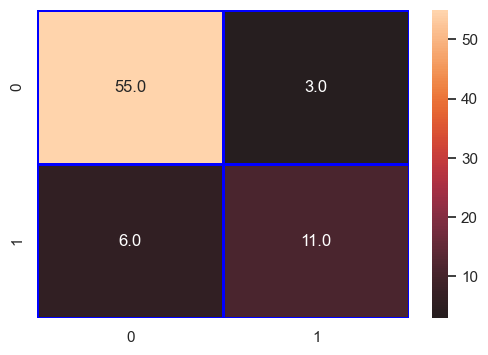

Root Mean Square Error (RMSE): 0.3464



Modele name : LogisticRegression
Scaler name : Normalizer
10 K-Fold Accuracy_score : [0.7667 0.7667 0.7667 0.7667 0.7667 0.7667 0.7667 0.7667 0.7667 0.7667]
10 K-Fold Average Accuracy_score : 76.67 %
Accuracy_score: 77.33 %
Loss: 22.67 %
Cohen_kappa_score: 0.0 %
Classification_report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        58
           1       0.00      0.00      0.00        17

    accuracy                           0.77        75
   macro avg       0.39      0.50      0.44        75
weighted avg       0.60      0.77      0.67        75

confusion_matrix:
 [[58  0]
 [17  0]]


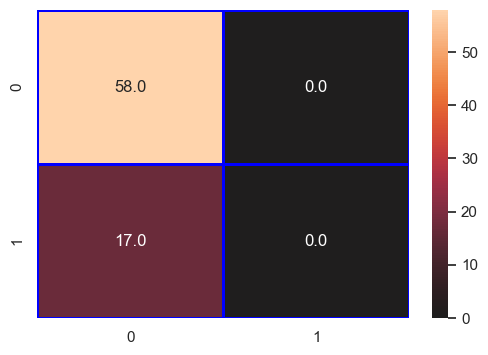

Root Mean Square Error (RMSE): 0.4761





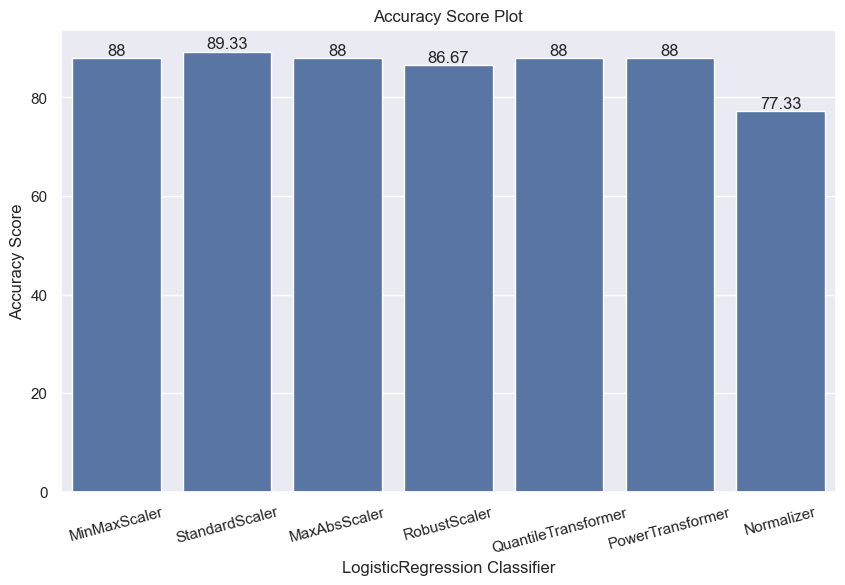

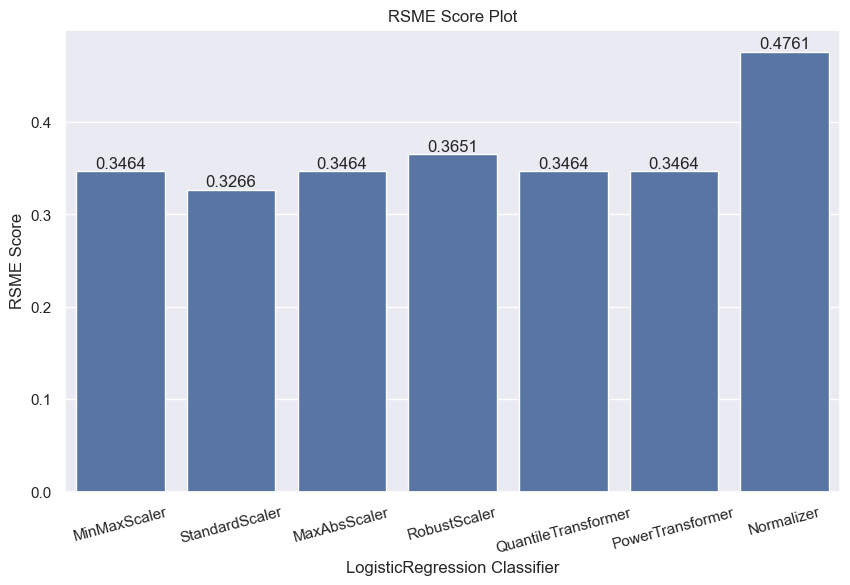




Modele name : KNeighborsClassifier
Scaler name : MinMaxScaler
10 K-Fold Accuracy_score : [0.8667 0.9    0.9    0.8333 0.8667 0.8333 0.8667 0.8667 0.8667 0.8   ]
10 K-Fold Average Accuracy_score : 86.0 %
Accuracy_score: 89.33 %
Loss: 10.67 %
Cohen_kappa_score: 63.5 %
Classification_report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        58
           1       1.00      0.53      0.69        17

    accuracy                           0.89        75
   macro avg       0.94      0.76      0.81        75
weighted avg       0.91      0.89      0.88        75

confusion_matrix:
 [[58  0]
 [ 8  9]]


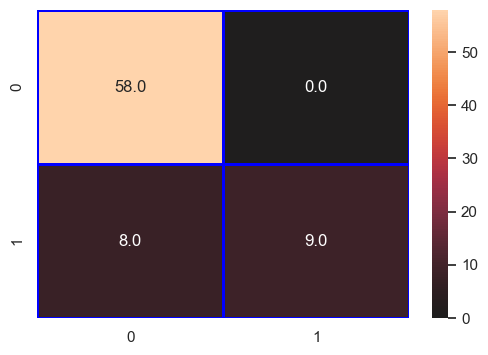

Root Mean Square Error (RMSE): 0.3266



Modele name : KNeighborsClassifier
Scaler name : StandardScaler
10 K-Fold Accuracy_score : [0.8333 0.9333 0.9    0.8333 0.8333 0.8667 0.8667 0.9    0.9333 0.8667]
10 K-Fold Average Accuracy_score : 87.67 %
Accuracy_score: 90.67 %
Loss: 9.33 %
Cohen_kappa_score: 68.84 %
Classification_report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        58
           1       1.00      0.59      0.74        17

    accuracy                           0.91        75
   macro avg       0.95      0.79      0.84        75
weighted avg       0.92      0.91      0.90        75

confusion_matrix:
 [[58  0]
 [ 7 10]]


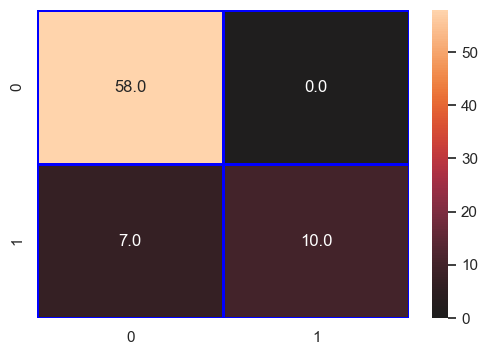

Root Mean Square Error (RMSE): 0.3055



Modele name : KNeighborsClassifier
Scaler name : MaxAbsScaler
10 K-Fold Accuracy_score : [0.8667 0.9    0.9    0.8333 0.8667 0.8333 0.8667 0.8667 0.8667 0.8   ]
10 K-Fold Average Accuracy_score : 86.0 %
Accuracy_score: 88.0 %
Loss: 12.0 %
Cohen_kappa_score: 57.89 %
Classification_report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        58
           1       1.00      0.47      0.64        17

    accuracy                           0.88        75
   macro avg       0.93      0.74      0.78        75
weighted avg       0.90      0.88      0.86        75

confusion_matrix:
 [[58  0]
 [ 9  8]]


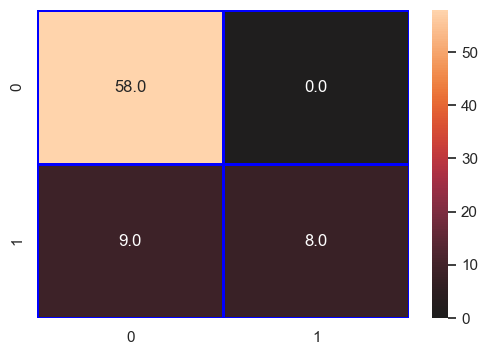

Root Mean Square Error (RMSE): 0.3464



Modele name : KNeighborsClassifier
Scaler name : RobustScaler
10 K-Fold Accuracy_score : [0.8    0.8667 0.9333 0.9    0.8667 0.8667 0.9    0.8667 0.9333 0.8667]
10 K-Fold Average Accuracy_score : 88.0 %
Accuracy_score: 90.67 %
Loss: 9.33 %
Cohen_kappa_score: 68.84 %
Classification_report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        58
           1       1.00      0.59      0.74        17

    accuracy                           0.91        75
   macro avg       0.95      0.79      0.84        75
weighted avg       0.92      0.91      0.90        75

confusion_matrix:
 [[58  0]
 [ 7 10]]


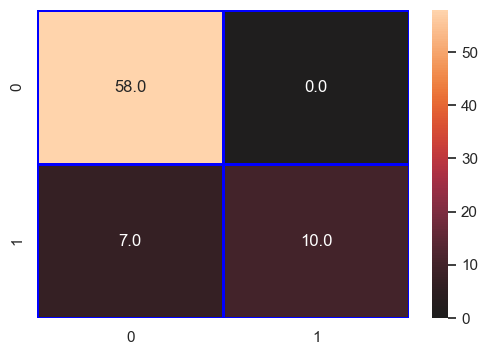

Root Mean Square Error (RMSE): 0.3055



Modele name : KNeighborsClassifier
Scaler name : QuantileTransformer
10 K-Fold Accuracy_score : [0.8333 0.9    0.9    0.8667 0.8667 0.8667 0.8    0.8667 0.8667 0.8667]
10 K-Fold Average Accuracy_score : 86.33 %
Accuracy_score: 89.33 %
Loss: 10.67 %
Cohen_kappa_score: 63.5 %
Classification_report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        58
           1       1.00      0.53      0.69        17

    accuracy                           0.89        75
   macro avg       0.94      0.76      0.81        75
weighted avg       0.91      0.89      0.88        75

confusion_matrix:
 [[58  0]
 [ 8  9]]


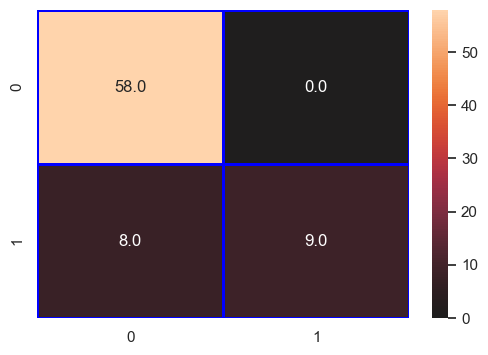

Root Mean Square Error (RMSE): 0.3266



Modele name : KNeighborsClassifier
Scaler name : PowerTransformer
10 K-Fold Accuracy_score : [0.8667 0.9333 0.9333 0.8333 0.8667 0.8667 0.9333 0.9    0.9333 0.8667]
10 K-Fold Average Accuracy_score : 89.33 %
Accuracy_score: 89.33 %
Loss: 10.67 %
Cohen_kappa_score: 63.5 %
Classification_report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        58
           1       1.00      0.53      0.69        17

    accuracy                           0.89        75
   macro avg       0.94      0.76      0.81        75
weighted avg       0.91      0.89      0.88        75

confusion_matrix:
 [[58  0]
 [ 8  9]]


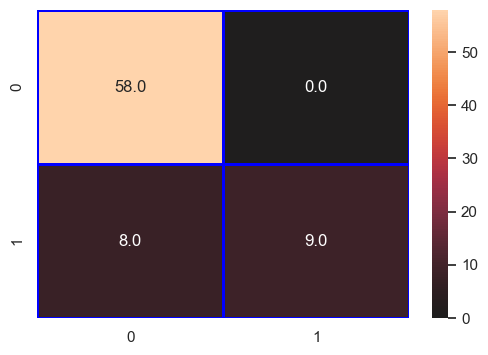

Root Mean Square Error (RMSE): 0.3266



Modele name : KNeighborsClassifier
Scaler name : Normalizer
10 K-Fold Accuracy_score : [0.8    0.8333 0.8333 0.8333 0.7333 0.7667 0.7667 0.8    0.7333 0.7   ]
10 K-Fold Average Accuracy_score : 78.0 %
Accuracy_score: 76.0 %
Loss: 24.0 %
Cohen_kappa_score: 25.33 %
Classification_report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85        58
           1       0.46      0.35      0.40        17

    accuracy                           0.76        75
   macro avg       0.64      0.62      0.63        75
weighted avg       0.74      0.76      0.75        75

confusion_matrix:
 [[51  7]
 [11  6]]


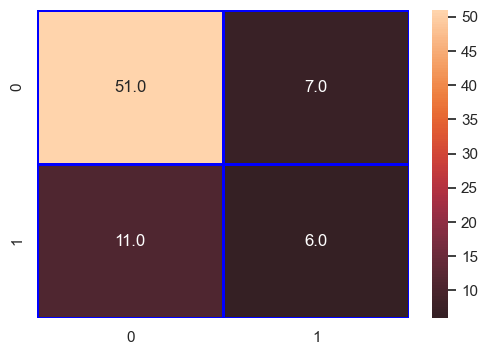

Root Mean Square Error (RMSE): 0.4899





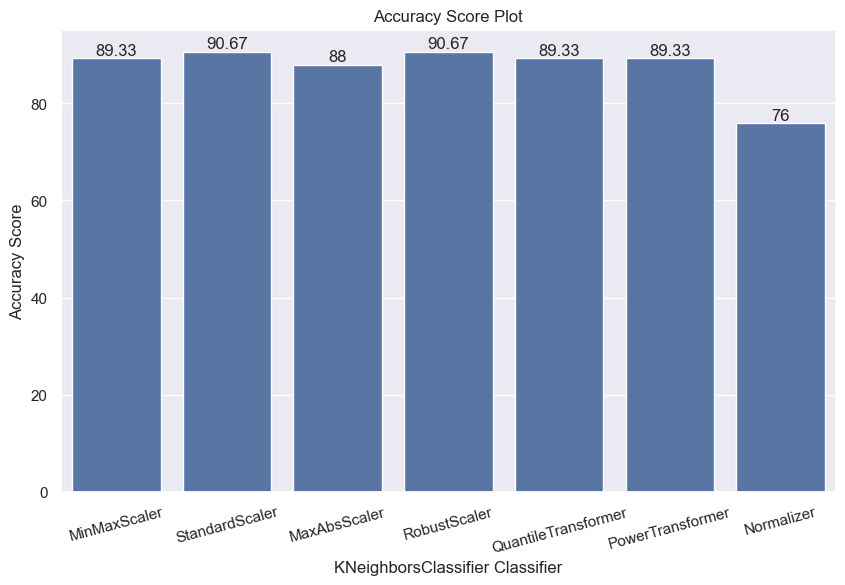

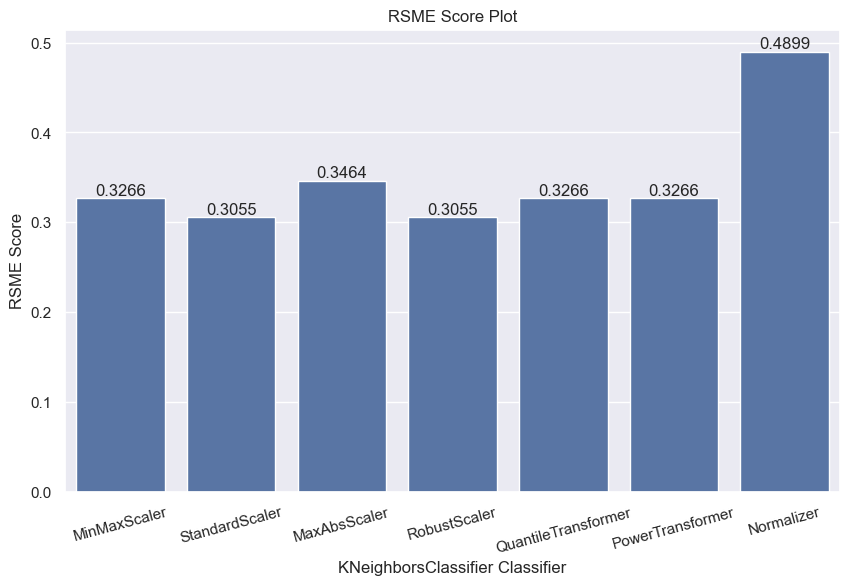




Modele name : GaussianNB
Scaler name : MinMaxScaler
10 K-Fold Accuracy_score : [0.9667 0.9    0.8667 0.8333 0.8667 0.8667 0.9667 0.9    0.8667 0.8667]
10 K-Fold Average Accuracy_score : 89.0 %
Accuracy_score: 85.33 %
Loss: 14.67 %
Cohen_kappa_score: 63.48 %
Classification_report:
               precision    recall  f1-score   support

           0       0.96      0.84      0.90        58
           1       0.62      0.88      0.73        17

    accuracy                           0.85        75
   macro avg       0.79      0.86      0.82        75
weighted avg       0.88      0.85      0.86        75

confusion_matrix:
 [[49  9]
 [ 2 15]]


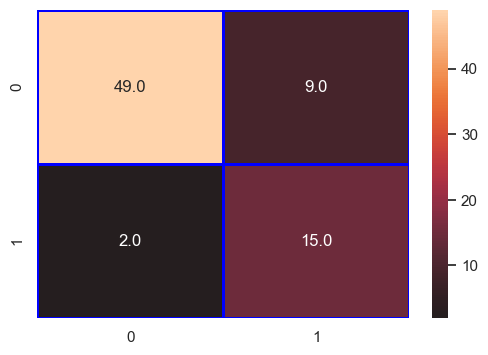

Root Mean Square Error (RMSE): 0.383



Modele name : GaussianNB
Scaler name : StandardScaler
10 K-Fold Accuracy_score : [0.9667 0.9    0.8667 0.8333 0.8667 0.8667 0.9667 0.9    0.8667 0.8667]
10 K-Fold Average Accuracy_score : 89.0 %
Accuracy_score: 85.33 %
Loss: 14.67 %
Cohen_kappa_score: 63.48 %
Classification_report:
               precision    recall  f1-score   support

           0       0.96      0.84      0.90        58
           1       0.62      0.88      0.73        17

    accuracy                           0.85        75
   macro avg       0.79      0.86      0.82        75
weighted avg       0.88      0.85      0.86        75

confusion_matrix:
 [[49  9]
 [ 2 15]]


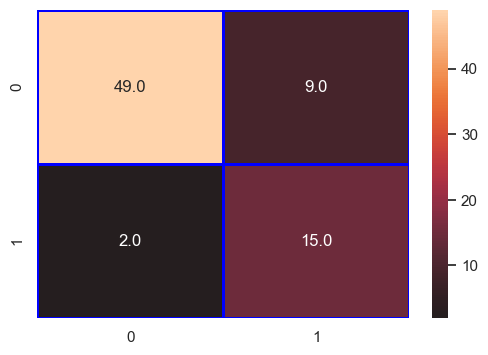

Root Mean Square Error (RMSE): 0.383



Modele name : GaussianNB
Scaler name : MaxAbsScaler
10 K-Fold Accuracy_score : [0.9667 0.9    0.8667 0.8333 0.8667 0.8667 0.9667 0.9    0.8667 0.8667]
10 K-Fold Average Accuracy_score : 89.0 %
Accuracy_score: 85.33 %
Loss: 14.67 %
Cohen_kappa_score: 63.48 %
Classification_report:
               precision    recall  f1-score   support

           0       0.96      0.84      0.90        58
           1       0.62      0.88      0.73        17

    accuracy                           0.85        75
   macro avg       0.79      0.86      0.82        75
weighted avg       0.88      0.85      0.86        75

confusion_matrix:
 [[49  9]
 [ 2 15]]


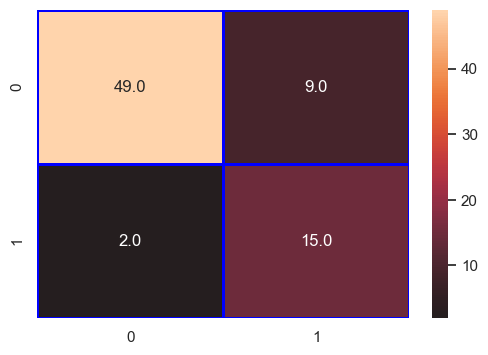

Root Mean Square Error (RMSE): 0.383



Modele name : GaussianNB
Scaler name : RobustScaler
10 K-Fold Accuracy_score : [0.9667 0.9    0.8667 0.8333 0.8667 0.8667 0.9667 0.9    0.8667 0.8667]
10 K-Fold Average Accuracy_score : 89.0 %
Accuracy_score: 85.33 %
Loss: 14.67 %
Cohen_kappa_score: 63.48 %
Classification_report:
               precision    recall  f1-score   support

           0       0.96      0.84      0.90        58
           1       0.62      0.88      0.73        17

    accuracy                           0.85        75
   macro avg       0.79      0.86      0.82        75
weighted avg       0.88      0.85      0.86        75

confusion_matrix:
 [[49  9]
 [ 2 15]]


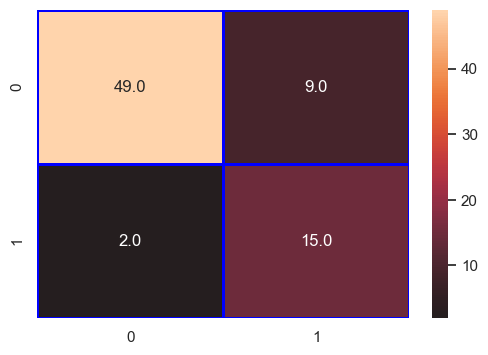

Root Mean Square Error (RMSE): 0.383



Modele name : GaussianNB
Scaler name : QuantileTransformer
10 K-Fold Accuracy_score : [0.9667 0.9    0.8667 0.8    0.8667 0.8333 0.9667 0.9    0.9333 0.8333]
10 K-Fold Average Accuracy_score : 88.67 %
Accuracy_score: 86.67 %
Loss: 13.33 %
Cohen_kappa_score: 64.89 %
Classification_report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91        58
           1       0.67      0.82      0.74        17

    accuracy                           0.87        75
   macro avg       0.81      0.85      0.82        75
weighted avg       0.88      0.87      0.87        75

confusion_matrix:
 [[51  7]
 [ 3 14]]


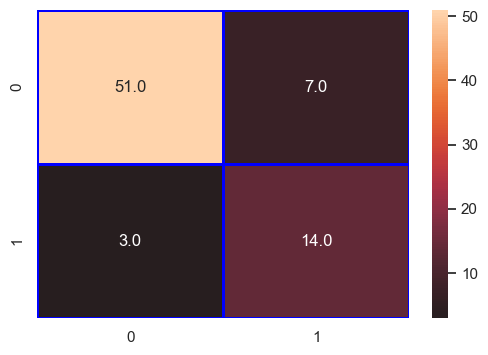

Root Mean Square Error (RMSE): 0.3651



Modele name : GaussianNB
Scaler name : PowerTransformer
10 K-Fold Accuracy_score : [0.9667 0.9    0.8667 0.8333 0.8333 0.8667 0.9667 0.9    0.9    0.8333]
10 K-Fold Average Accuracy_score : 88.67 %
Accuracy_score: 86.67 %
Loss: 13.33 %
Cohen_kappa_score: 64.89 %
Classification_report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91        58
           1       0.67      0.82      0.74        17

    accuracy                           0.87        75
   macro avg       0.81      0.85      0.82        75
weighted avg       0.88      0.87      0.87        75

confusion_matrix:
 [[51  7]
 [ 3 14]]


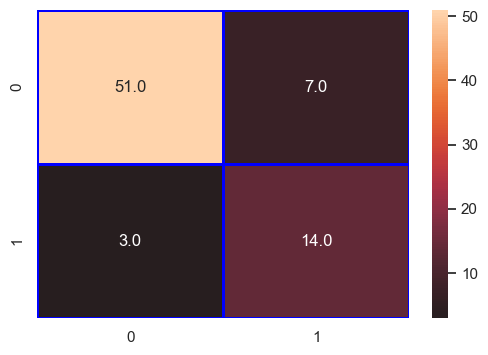

Root Mean Square Error (RMSE): 0.3651



Modele name : GaussianNB
Scaler name : Normalizer
10 K-Fold Accuracy_score : [0.9667 0.9    0.8667 0.8    0.8667 0.9    0.9    0.9    0.8667 0.8333]
10 K-Fold Average Accuracy_score : 88.0 %
Accuracy_score: 85.33 %
Loss: 14.67 %
Cohen_kappa_score: 63.48 %
Classification_report:
               precision    recall  f1-score   support

           0       0.96      0.84      0.90        58
           1       0.62      0.88      0.73        17

    accuracy                           0.85        75
   macro avg       0.79      0.86      0.82        75
weighted avg       0.88      0.85      0.86        75

confusion_matrix:
 [[49  9]
 [ 2 15]]


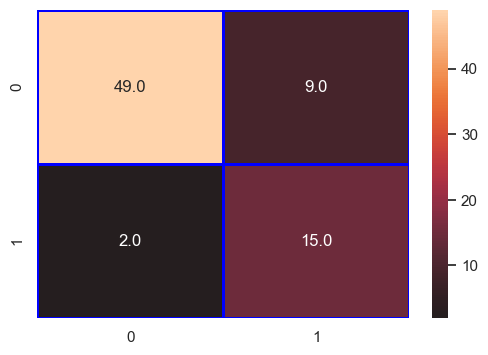

Root Mean Square Error (RMSE): 0.383





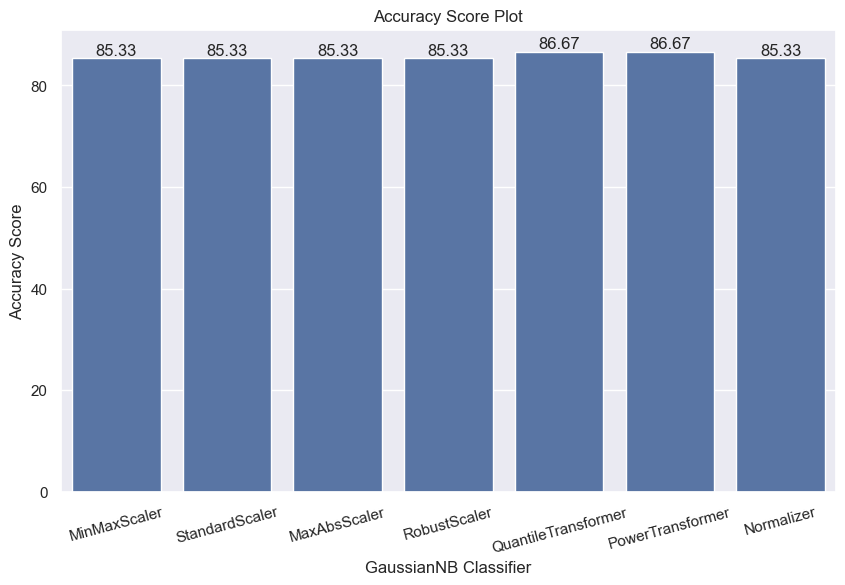

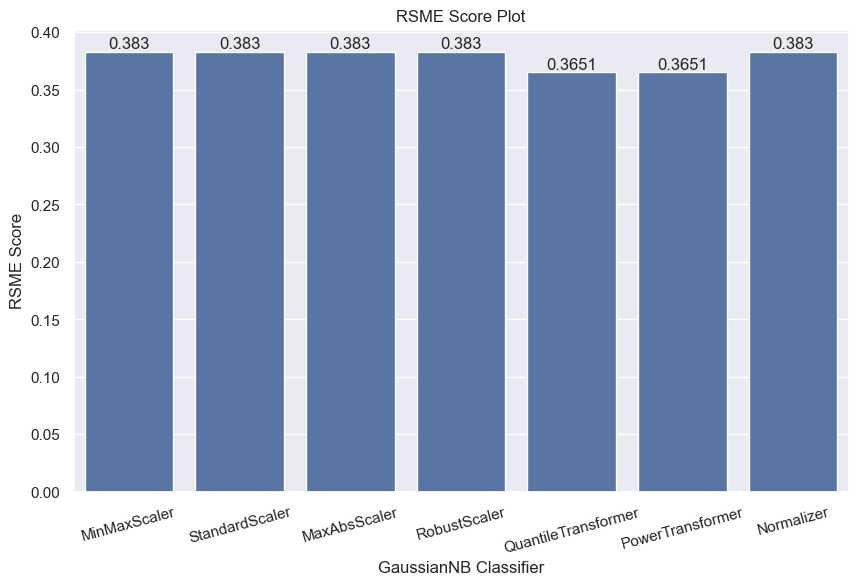




Modele name : DecisionTreeClassifier
Scaler name : MinMaxScaler
10 K-Fold Accuracy_score : [0.9333 0.9    0.9667 0.9    0.8667 0.9333 0.9    0.9    0.9333 0.9   ]
10 K-Fold Average Accuracy_score : 91.33 %
Accuracy_score: 93.33 %
Loss: 6.67 %
Cohen_kappa_score: 81.37 %
Classification_report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96        58
           1       0.83      0.88      0.86        17

    accuracy                           0.93        75
   macro avg       0.90      0.92      0.91        75
weighted avg       0.94      0.93      0.93        75

confusion_matrix:
 [[55  3]
 [ 2 15]]


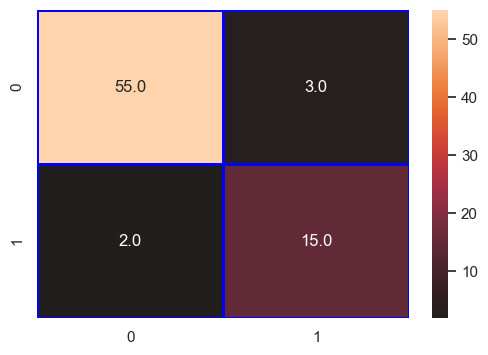

Root Mean Square Error (RMSE): 0.2582



Modele name : DecisionTreeClassifier
Scaler name : StandardScaler
10 K-Fold Accuracy_score : [0.9667 0.9    0.9667 0.9    0.8333 1.     0.9    0.8667 0.9667 0.9   ]
10 K-Fold Average Accuracy_score : 92.0 %
Accuracy_score: 92.0 %
Loss: 8.0 %
Cohen_kappa_score: 77.18 %
Classification_report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        58
           1       0.82      0.82      0.82        17

    accuracy                           0.92        75
   macro avg       0.89      0.89      0.89        75
weighted avg       0.92      0.92      0.92        75

confusion_matrix:
 [[55  3]
 [ 3 14]]


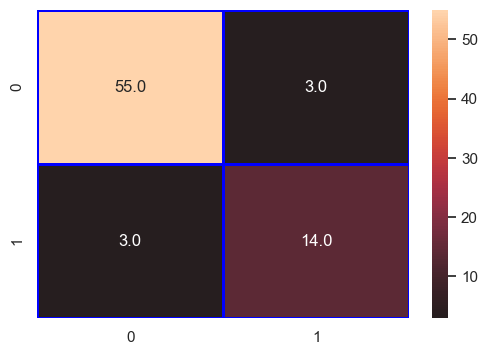

Root Mean Square Error (RMSE): 0.2828



Modele name : DecisionTreeClassifier
Scaler name : MaxAbsScaler
10 K-Fold Accuracy_score : [0.9667 0.9    0.9667 0.9    0.8333 1.     0.9    0.9    0.9333 0.9   ]
10 K-Fold Average Accuracy_score : 92.0 %
Accuracy_score: 90.67 %
Loss: 9.33 %
Cohen_kappa_score: 73.92 %
Classification_report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        58
           1       0.78      0.82      0.80        17

    accuracy                           0.91        75
   macro avg       0.86      0.88      0.87        75
weighted avg       0.91      0.91      0.91        75

confusion_matrix:
 [[54  4]
 [ 3 14]]


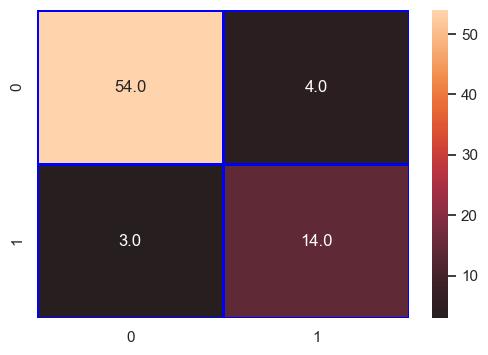

Root Mean Square Error (RMSE): 0.3055



Modele name : DecisionTreeClassifier
Scaler name : RobustScaler
10 K-Fold Accuracy_score : [0.9667 0.8667 0.9667 0.9    0.8667 0.9667 0.9    0.9    0.9    0.9   ]
10 K-Fold Average Accuracy_score : 91.33 %
Accuracy_score: 92.0 %
Loss: 8.0 %
Cohen_kappa_score: 77.18 %
Classification_report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        58
           1       0.82      0.82      0.82        17

    accuracy                           0.92        75
   macro avg       0.89      0.89      0.89        75
weighted avg       0.92      0.92      0.92        75

confusion_matrix:
 [[55  3]
 [ 3 14]]


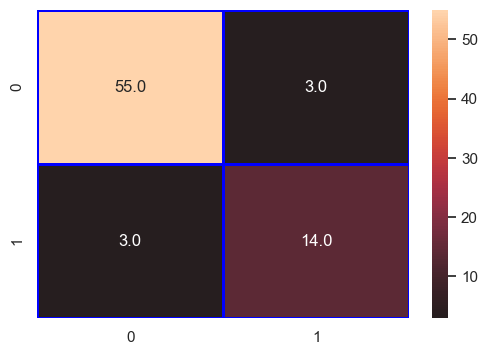

Root Mean Square Error (RMSE): 0.2828



Modele name : DecisionTreeClassifier
Scaler name : QuantileTransformer
10 K-Fold Accuracy_score : [0.9    0.8667 0.9667 0.9    0.8667 0.9667 0.9    0.9    0.9667 0.9   ]
10 K-Fold Average Accuracy_score : 91.33 %
Accuracy_score: 92.0 %
Loss: 8.0 %
Cohen_kappa_score: 77.18 %
Classification_report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        58
           1       0.82      0.82      0.82        17

    accuracy                           0.92        75
   macro avg       0.89      0.89      0.89        75
weighted avg       0.92      0.92      0.92        75

confusion_matrix:
 [[55  3]
 [ 3 14]]


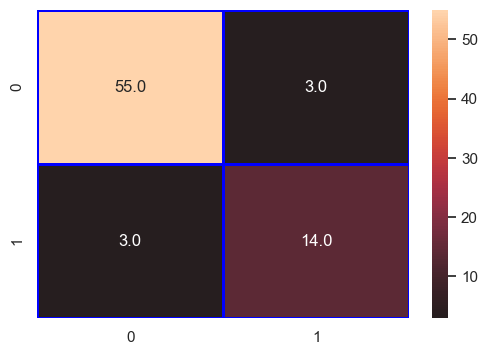

Root Mean Square Error (RMSE): 0.2828



Modele name : DecisionTreeClassifier
Scaler name : PowerTransformer
10 K-Fold Accuracy_score : [0.9667 0.8667 0.9667 0.9    0.8667 1.     0.9    0.9    0.9    0.9   ]
10 K-Fold Average Accuracy_score : 91.67 %
Accuracy_score: 94.67 %
Loss: 5.33 %
Cohen_kappa_score: 84.13 %
Classification_report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        58
           1       0.93      0.82      0.87        17

    accuracy                           0.95        75
   macro avg       0.94      0.90      0.92        75
weighted avg       0.95      0.95      0.95        75

confusion_matrix:
 [[57  1]
 [ 3 14]]


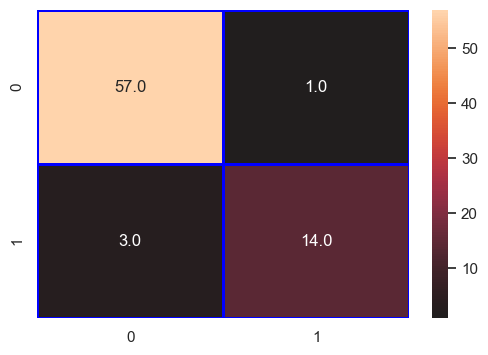

Root Mean Square Error (RMSE): 0.2309



Modele name : DecisionTreeClassifier
Scaler name : Normalizer
10 K-Fold Accuracy_score : [0.9667 0.9667 0.9667 0.8333 0.9    0.9333 0.9333 0.9333 0.9667 0.9667]
10 K-Fold Average Accuracy_score : 93.67 %
Accuracy_score: 98.67 %
Loss: 1.33 %
Cohen_kappa_score: 96.12 %
Classification_report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.94      0.97        17

    accuracy                           0.99        75
   macro avg       0.99      0.97      0.98        75
weighted avg       0.99      0.99      0.99        75

confusion_matrix:
 [[58  0]
 [ 1 16]]


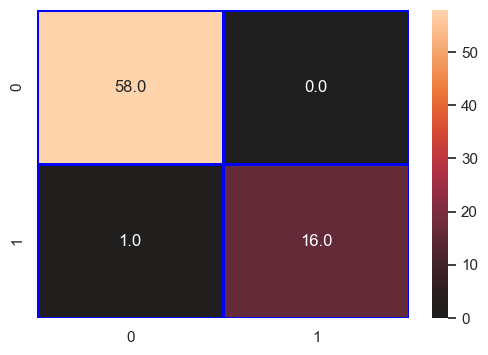

Root Mean Square Error (RMSE): 0.1155





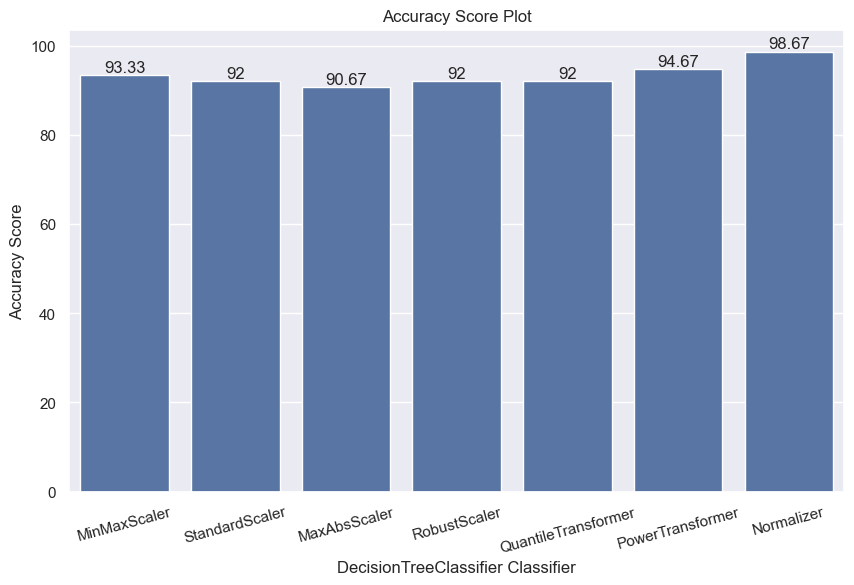

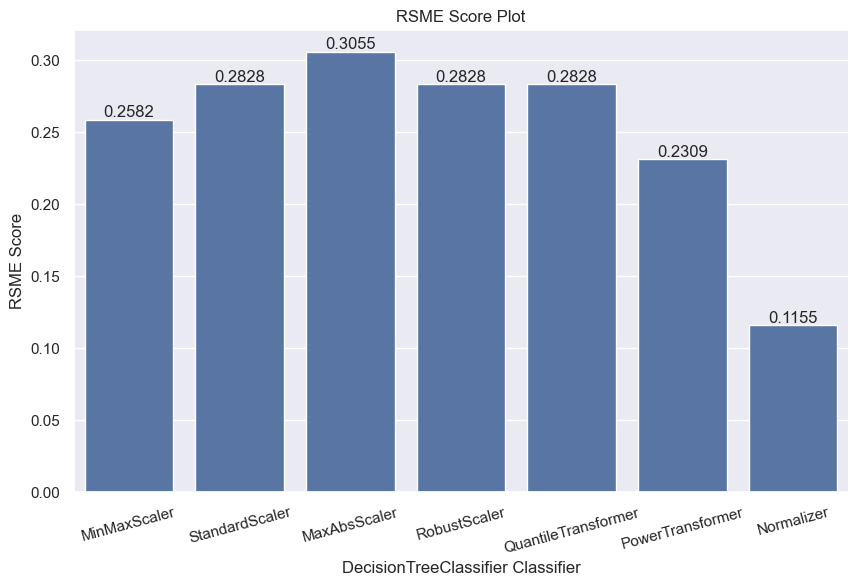




Modele name : RandomForestClassifier
Scaler name : MinMaxScaler
10 K-Fold Accuracy_score : [1.     0.9333 0.9667 0.8667 0.9    0.9667 0.9    0.9667 1.     0.9333]
10 K-Fold Average Accuracy_score : 94.33 %
Accuracy_score: 93.33 %
Loss: 6.67 %
Cohen_kappa_score: 78.78 %
Classification_report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        58
           1       1.00      0.71      0.83        17

    accuracy                           0.93        75
   macro avg       0.96      0.85      0.89        75
weighted avg       0.94      0.93      0.93        75

confusion_matrix:
 [[58  0]
 [ 5 12]]


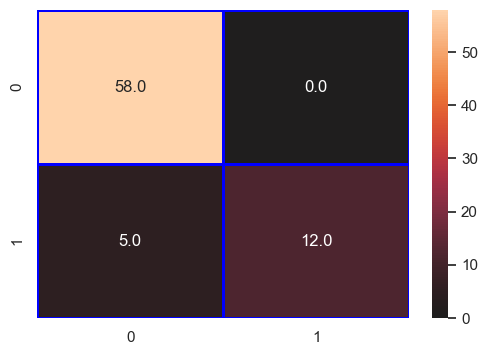

Root Mean Square Error (RMSE): 0.2582



Modele name : RandomForestClassifier
Scaler name : StandardScaler
10 K-Fold Accuracy_score : [1.     0.9667 0.9667 0.8667 0.9    0.9667 0.9    0.9667 1.     0.9333]
10 K-Fold Average Accuracy_score : 94.67 %
Accuracy_score: 94.67 %
Loss: 5.33 %
Cohen_kappa_score: 83.41 %
Classification_report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        58
           1       1.00      0.76      0.87        17

    accuracy                           0.95        75
   macro avg       0.97      0.88      0.92        75
weighted avg       0.95      0.95      0.94        75

confusion_matrix:
 [[58  0]
 [ 4 13]]


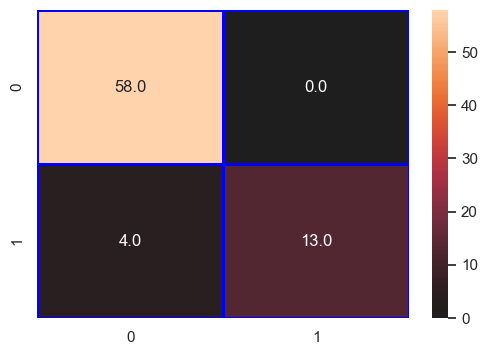

Root Mean Square Error (RMSE): 0.2309



Modele name : RandomForestClassifier
Scaler name : MaxAbsScaler
10 K-Fold Accuracy_score : [0.9667 0.9333 0.9667 0.8667 0.9    0.9667 0.9    0.9333 1.     0.9333]
10 K-Fold Average Accuracy_score : 93.67 %
Accuracy_score: 93.33 %
Loss: 6.67 %
Cohen_kappa_score: 78.78 %
Classification_report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        58
           1       1.00      0.71      0.83        17

    accuracy                           0.93        75
   macro avg       0.96      0.85      0.89        75
weighted avg       0.94      0.93      0.93        75

confusion_matrix:
 [[58  0]
 [ 5 12]]


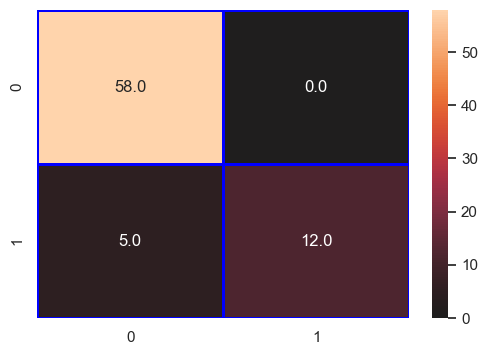

Root Mean Square Error (RMSE): 0.2582



Modele name : RandomForestClassifier
Scaler name : RobustScaler
10 K-Fold Accuracy_score : [0.9667 0.9333 0.9667 0.8667 0.9    0.9667 0.9    0.9667 1.     0.9333]
10 K-Fold Average Accuracy_score : 94.0 %
Accuracy_score: 93.33 %
Loss: 6.67 %
Cohen_kappa_score: 78.78 %
Classification_report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        58
           1       1.00      0.71      0.83        17

    accuracy                           0.93        75
   macro avg       0.96      0.85      0.89        75
weighted avg       0.94      0.93      0.93        75

confusion_matrix:
 [[58  0]
 [ 5 12]]


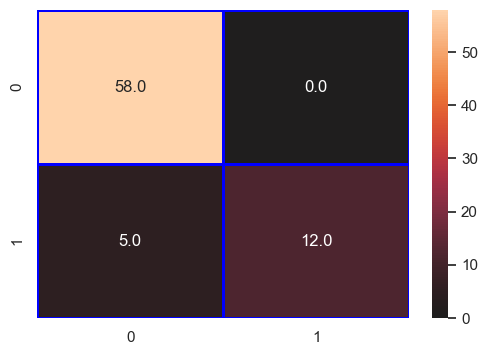

Root Mean Square Error (RMSE): 0.2582



Modele name : RandomForestClassifier
Scaler name : QuantileTransformer
10 K-Fold Accuracy_score : [1.     0.9333 0.9667 0.8667 0.9333 0.9667 0.9    0.9667 1.     0.9333]
10 K-Fold Average Accuracy_score : 94.67 %
Accuracy_score: 96.0 %
Loss: 4.0 %
Cohen_kappa_score: 87.83 %
Classification_report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.82      0.90        17

    accuracy                           0.96        75
   macro avg       0.98      0.91      0.94        75
weighted avg       0.96      0.96      0.96        75

confusion_matrix:
 [[58  0]
 [ 3 14]]


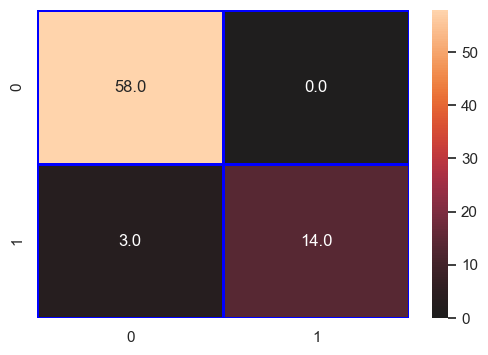

Root Mean Square Error (RMSE): 0.2



Modele name : RandomForestClassifier
Scaler name : PowerTransformer
10 K-Fold Accuracy_score : [0.9667 0.9333 0.9667 0.8667 0.9333 0.9667 0.9    0.9667 1.     0.9333]
10 K-Fold Average Accuracy_score : 94.33 %
Accuracy_score: 96.0 %
Loss: 4.0 %
Cohen_kappa_score: 87.83 %
Classification_report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.82      0.90        17

    accuracy                           0.96        75
   macro avg       0.98      0.91      0.94        75
weighted avg       0.96      0.96      0.96        75

confusion_matrix:
 [[58  0]
 [ 3 14]]


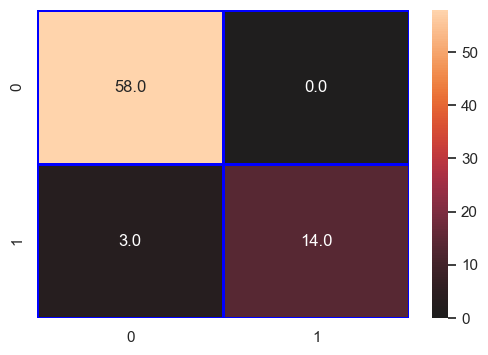

Root Mean Square Error (RMSE): 0.2



Modele name : RandomForestClassifier
Scaler name : Normalizer
10 K-Fold Accuracy_score : [0.9667 0.9333 0.9667 0.8667 0.8333 0.9667 0.9    0.9333 1.     0.9333]
10 K-Fold Average Accuracy_score : 93.0 %
Accuracy_score: 94.67 %
Loss: 5.33 %
Cohen_kappa_score: 83.41 %
Classification_report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        58
           1       1.00      0.76      0.87        17

    accuracy                           0.95        75
   macro avg       0.97      0.88      0.92        75
weighted avg       0.95      0.95      0.94        75

confusion_matrix:
 [[58  0]
 [ 4 13]]


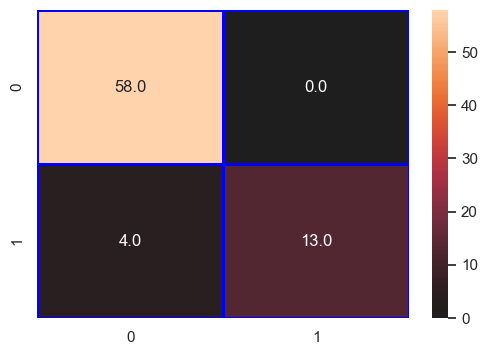

Root Mean Square Error (RMSE): 0.2309





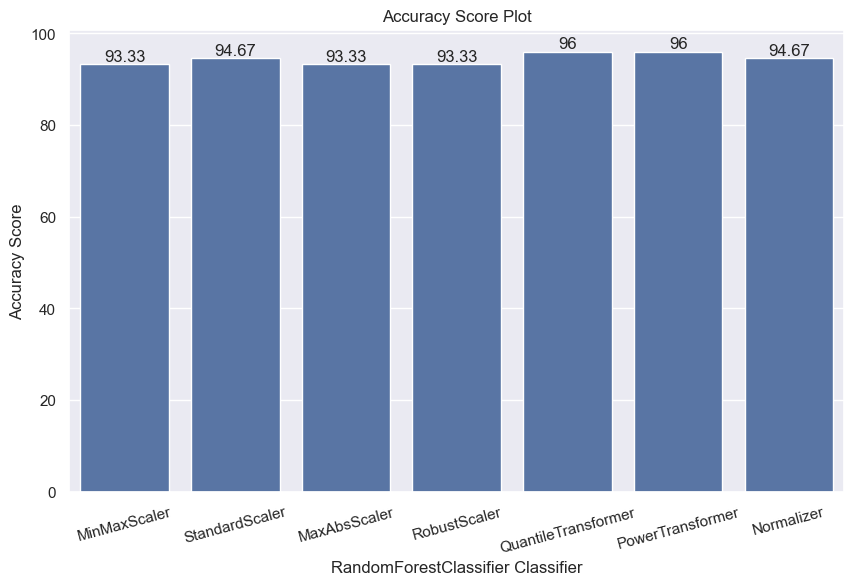

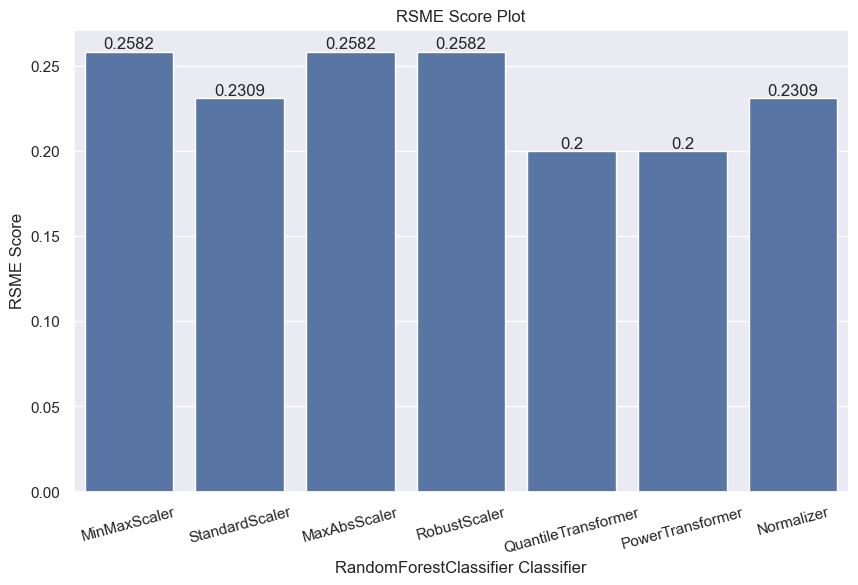




Modele name : SVC
Scaler name : MinMaxScaler
10 K-Fold Accuracy_score : [0.9333 0.9    0.9333 0.8667 0.9    0.9333 0.9    0.9    0.9333 0.9   ]
10 K-Fold Average Accuracy_score : 91.0 %
Accuracy_score: 94.67 %
Loss: 5.33 %
Cohen_kappa_score: 83.41 %
Classification_report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        58
           1       1.00      0.76      0.87        17

    accuracy                           0.95        75
   macro avg       0.97      0.88      0.92        75
weighted avg       0.95      0.95      0.94        75

confusion_matrix:
 [[58  0]
 [ 4 13]]


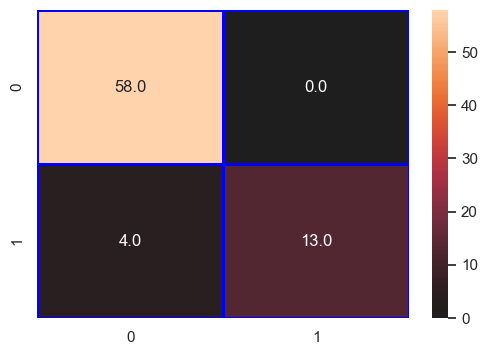

Root Mean Square Error (RMSE): 0.2309



Modele name : SVC
Scaler name : StandardScaler
10 K-Fold Accuracy_score : [0.9    0.9    0.9667 0.8667 0.8667 0.9667 0.9    0.8667 0.9667 0.9   ]
10 K-Fold Average Accuracy_score : 91.0 %
Accuracy_score: 92.0 %
Loss: 8.0 %
Cohen_kappa_score: 73.93 %
Classification_report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        58
           1       1.00      0.65      0.79        17

    accuracy                           0.92        75
   macro avg       0.95      0.82      0.87        75
weighted avg       0.93      0.92      0.91        75

confusion_matrix:
 [[58  0]
 [ 6 11]]


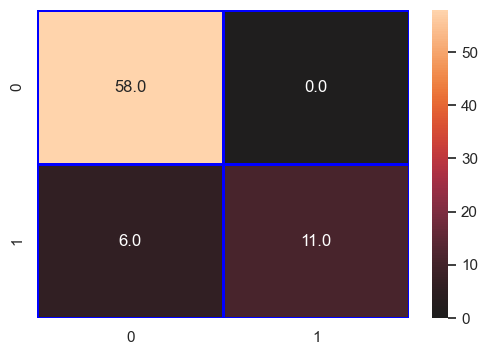

Root Mean Square Error (RMSE): 0.2828



Modele name : SVC
Scaler name : MaxAbsScaler
10 K-Fold Accuracy_score : [0.9333 0.9    0.9333 0.8667 0.8667 0.9667 0.9    0.9    0.9333 0.8667]
10 K-Fold Average Accuracy_score : 90.67 %
Accuracy_score: 94.67 %
Loss: 5.33 %
Cohen_kappa_score: 83.41 %
Classification_report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        58
           1       1.00      0.76      0.87        17

    accuracy                           0.95        75
   macro avg       0.97      0.88      0.92        75
weighted avg       0.95      0.95      0.94        75

confusion_matrix:
 [[58  0]
 [ 4 13]]


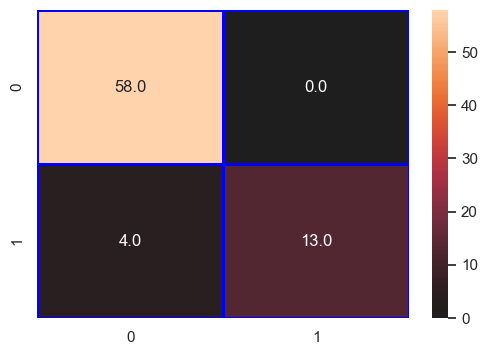

Root Mean Square Error (RMSE): 0.2309



Modele name : SVC
Scaler name : RobustScaler
10 K-Fold Accuracy_score : [0.9333 0.9    0.9667 0.9    0.8667 0.9667 0.9    0.9    0.9333 0.9   ]
10 K-Fold Average Accuracy_score : 91.67 %
Accuracy_score: 93.33 %
Loss: 6.67 %
Cohen_kappa_score: 79.72 %
Classification_report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96        58
           1       0.93      0.76      0.84        17

    accuracy                           0.93        75
   macro avg       0.93      0.87      0.90        75
weighted avg       0.93      0.93      0.93        75

confusion_matrix:
 [[57  1]
 [ 4 13]]


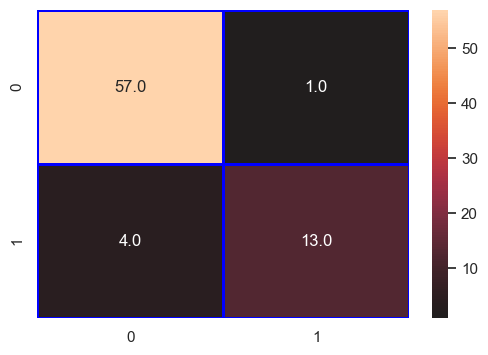

Root Mean Square Error (RMSE): 0.2582



Modele name : SVC
Scaler name : QuantileTransformer
10 K-Fold Accuracy_score : [0.9333 0.9    0.9333 0.9    0.8667 0.9    0.9    0.9    0.9333 0.9   ]
10 K-Fold Average Accuracy_score : 90.67 %
Accuracy_score: 92.0 %
Loss: 8.0 %
Cohen_kappa_score: 73.93 %
Classification_report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        58
           1       1.00      0.65      0.79        17

    accuracy                           0.92        75
   macro avg       0.95      0.82      0.87        75
weighted avg       0.93      0.92      0.91        75

confusion_matrix:
 [[58  0]
 [ 6 11]]


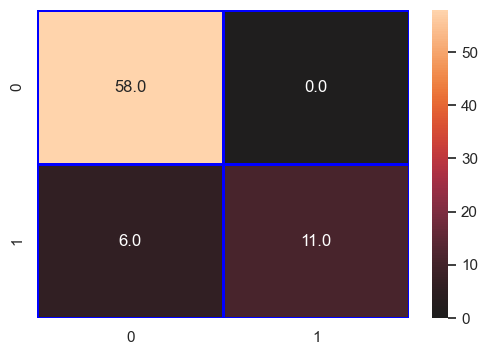

Root Mean Square Error (RMSE): 0.2828



Modele name : SVC
Scaler name : PowerTransformer
10 K-Fold Accuracy_score : [0.9    0.9    0.9667 0.8667 0.8667 0.9667 0.9    0.9    0.9667 0.9   ]
10 K-Fold Average Accuracy_score : 91.33 %
Accuracy_score: 93.33 %
Loss: 6.67 %
Cohen_kappa_score: 78.78 %
Classification_report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        58
           1       1.00      0.71      0.83        17

    accuracy                           0.93        75
   macro avg       0.96      0.85      0.89        75
weighted avg       0.94      0.93      0.93        75

confusion_matrix:
 [[58  0]
 [ 5 12]]


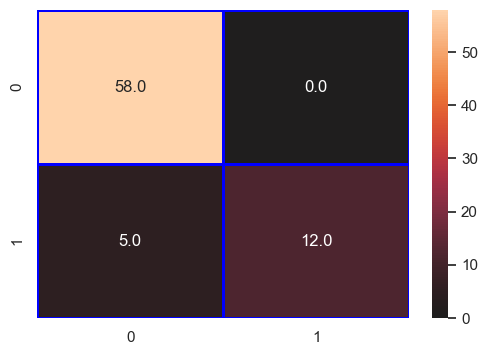

Root Mean Square Error (RMSE): 0.2582



Modele name : SVC
Scaler name : Normalizer
10 K-Fold Accuracy_score : [0.7667 0.7667 0.7667 0.7667 0.7667 0.7667 0.7667 0.7667 0.7667 0.7667]
10 K-Fold Average Accuracy_score : 76.67 %
Accuracy_score: 77.33 %
Loss: 22.67 %
Cohen_kappa_score: 0.0 %
Classification_report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        58
           1       0.00      0.00      0.00        17

    accuracy                           0.77        75
   macro avg       0.39      0.50      0.44        75
weighted avg       0.60      0.77      0.67        75

confusion_matrix:
 [[58  0]
 [17  0]]


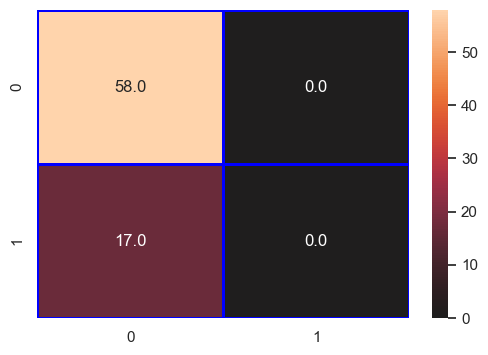

Root Mean Square Error (RMSE): 0.4761





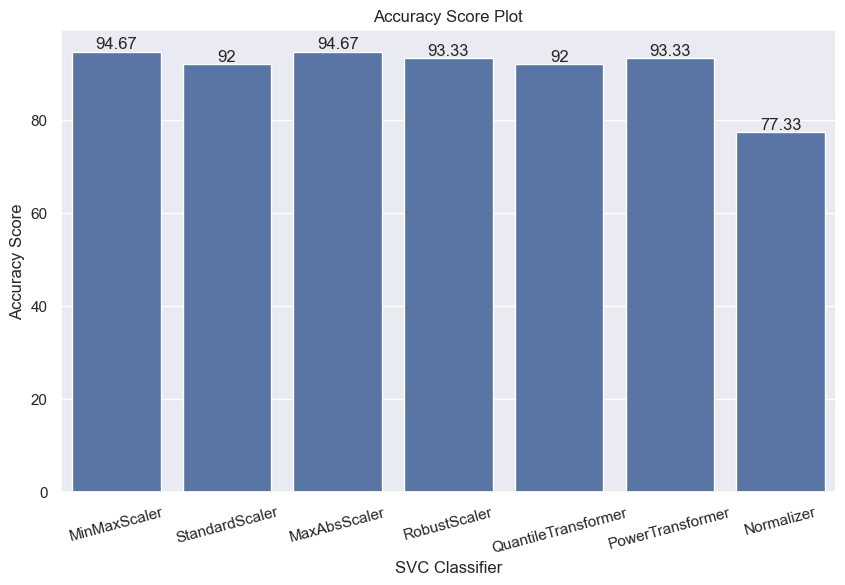

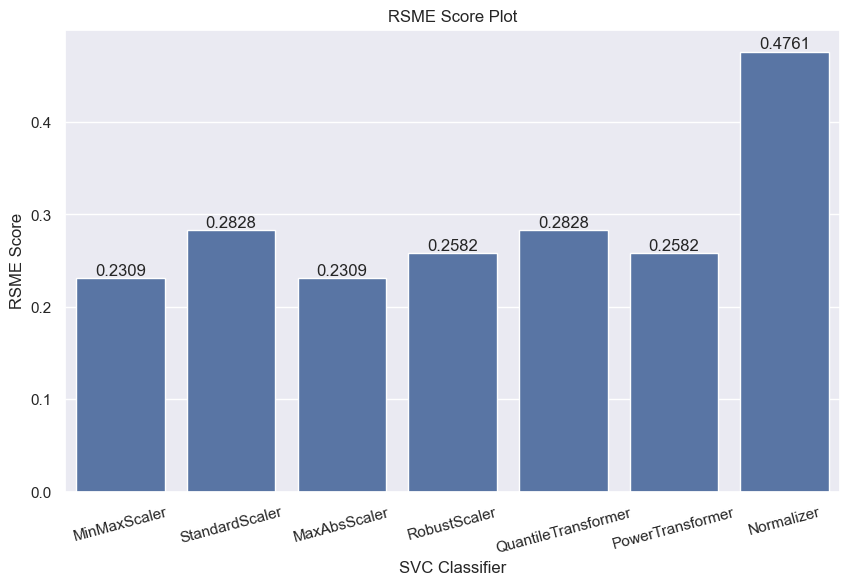




Modele name : LinearRegression
Scaler name : MinMaxScaler
10 K-Fold Accuracy_score : [nan nan nan nan nan nan nan nan nan nan]
10 K-Fold Average Accuracy_score : nan %
Root Mean Square Error (RMSE): 0.32



Modele name : LinearRegression
Scaler name : StandardScaler
10 K-Fold Accuracy_score : [nan nan nan nan nan nan nan nan nan nan]
10 K-Fold Average Accuracy_score : nan %
Root Mean Square Error (RMSE): 0.32



Modele name : LinearRegression
Scaler name : MaxAbsScaler
10 K-Fold Accuracy_score : [nan nan nan nan nan nan nan nan nan nan]
10 K-Fold Average Accuracy_score : nan %
Root Mean Square Error (RMSE): 0.32



Modele name : LinearRegression
Scaler name : RobustScaler
10 K-Fold Accuracy_score : [nan nan nan nan nan nan nan nan nan nan]
10 K-Fold Average Accuracy_score : nan %
Root Mean Square Error (RMSE): 0.32



Modele name : LinearRegression
Scaler name : QuantileTransformer
10 K-Fold Accuracy_score : [nan nan nan nan nan nan nan nan nan nan]
10 K-Fold Average Accuracy_score 

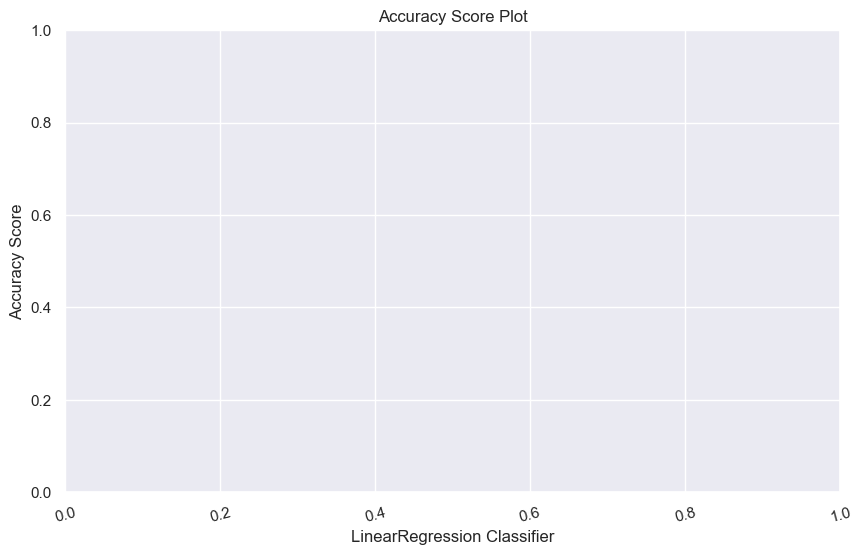

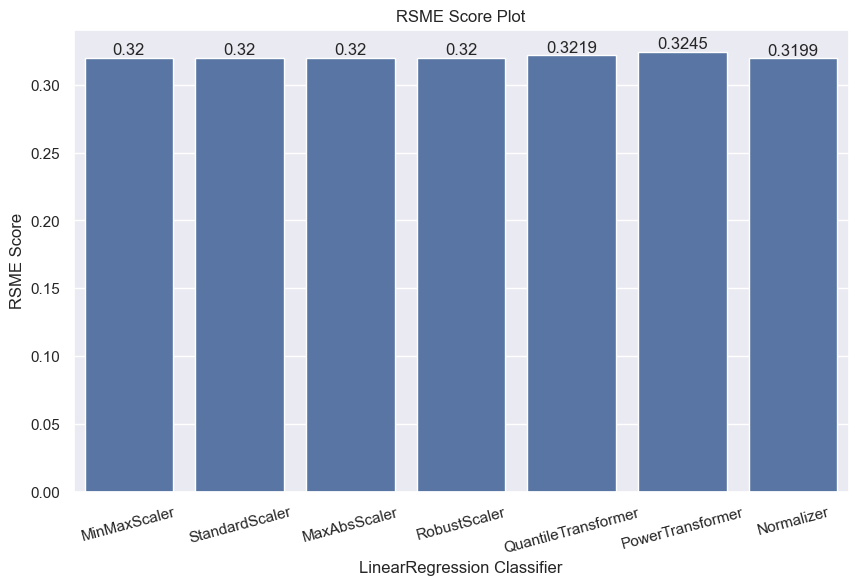




Done...


In [30]:
for model in model_list:
    for scaler in scaler_list:
        run_pipeline(X_train, X_test, y_train, y_test, scaler, model)
    
    # plot data
    plot_df = pd.DataFrame(plot_data_list, columns=['classifier', 'scaler', 'accuracy_score'])
    plot_df.to_csv(f"Dataset\\{str(type(model).__name__)}_accuracy_score_plot_data_01_LS_Disease_Prediction.csv", index=False)

    sns.set(rc={'figure.figsize':(10,6)})
    # ax = sns.barplot(data=plot_df, x="classifier", y="accuracy_score", hue="scaler")
    ax = sns.barplot(data=plot_df, x="scaler", y="accuracy_score") # , hue="scaler"
    plt.title('Accuracy Score Plot')
    plt.xlabel(str(type(model).__name__)+' Classifier')
    plt.ylabel('Accuracy Score')
    ax.tick_params(axis='x', rotation=15)
    for i in ax.containers:
        ax.bar_label(i,)
    plt.show()


    plot_RSME = pd.DataFrame(plot_RSME_list, columns=['classifier', 'scaler', 'RSME_score'])
    plot_RSME.to_csv(f"Dataset\\{str(type(model).__name__)}_RSME_score_plot_data_01_LS_Disease_Prediction.csv", index=False)

    sns.set(rc={'figure.figsize':(10,6)})
    # ax = sns.barplot(data=plot_df, x="classifier", y="accuracy_score", hue="scaler")
    ax = sns.barplot(data=plot_RSME, x="scaler", y="RSME_score") # , hue="scaler"
    plt.title('RSME Score Plot')
    plt.xlabel(str(type(model).__name__)+' Classifier')
    plt.ylabel('RSME Score')
    ax.tick_params(axis='x', rotation=15)
    for i in ax.containers:
        ax.bar_label(i,)
    plt.show()


    # empty list
    plot_data_list = []
    plot_RSME_list = []
    print("\n\n")

print("Done...")